<a href="https://colab.research.google.com/github/jessicacristinams/BootcampTECHMINAs/blob/main/Desafios_Estat%C3%ADsitica_Tech_Minas_Sarah_Gilbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

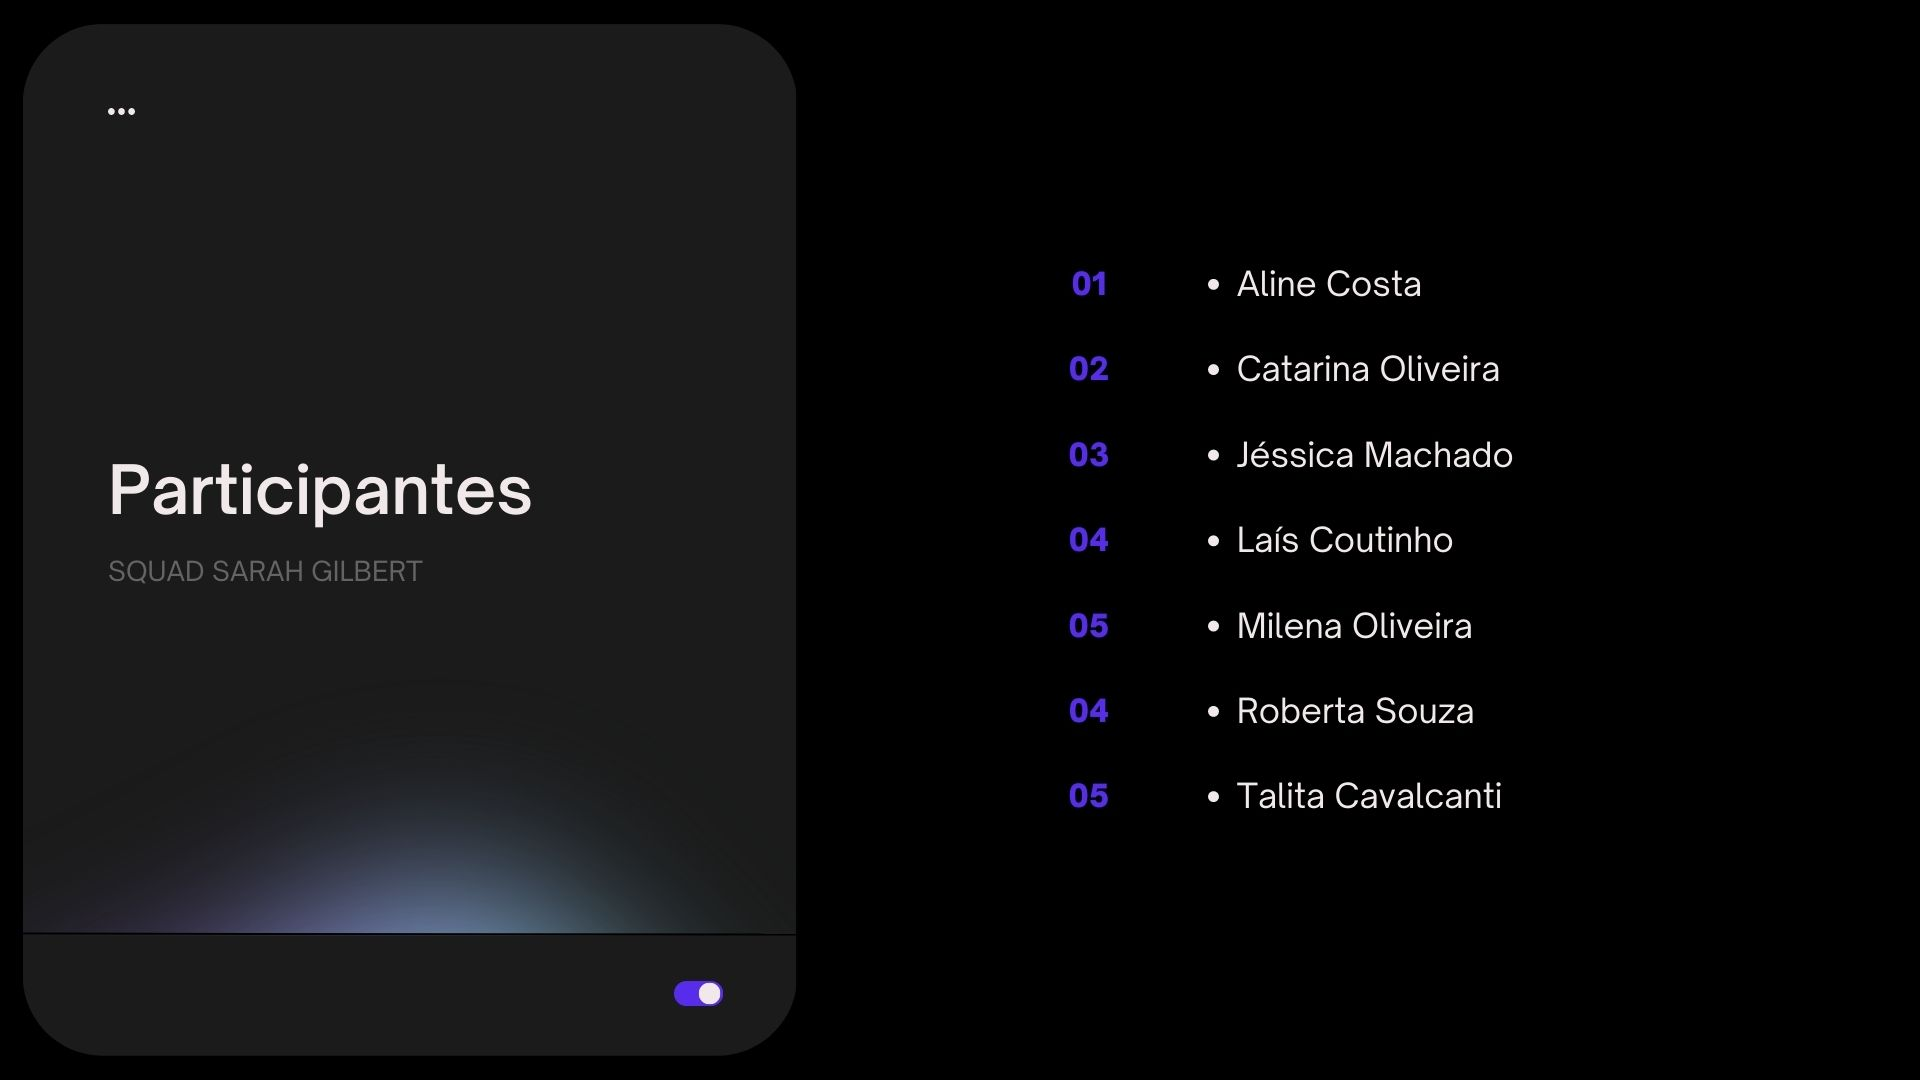

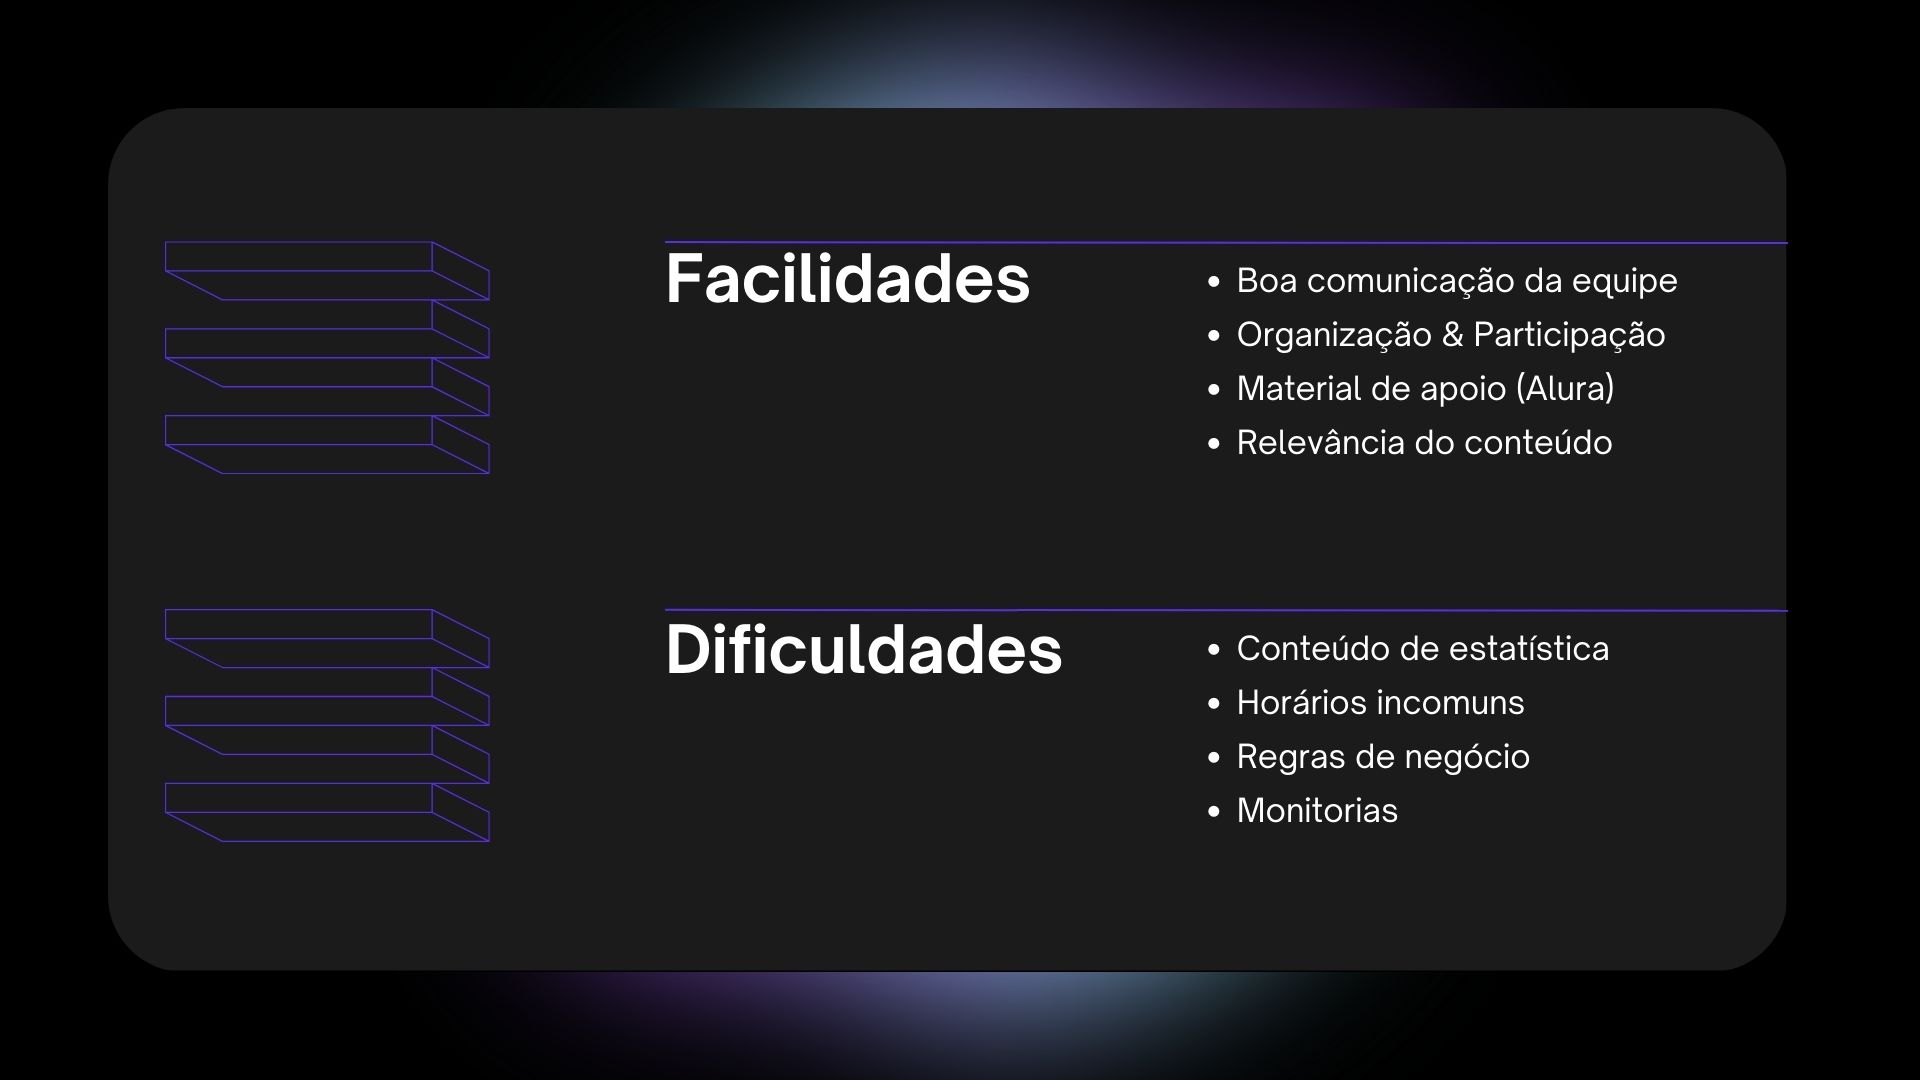

# IMPORTAÇÃO DAS BIBLIOTECAS

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats
import pickle

# DESAFIO 1 : FREQUÊNCIA E MEDIDAS

## Base de Dados

In [ ]:
# Link da base de dados : https://www.kaggle.com/spscientist/students-performance-in-exams
dados = pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 1. Leia a base de dados e faça uma análise inicial, como por exemplo,verificar o tamanho da base de dados (quantidade de linhas e colunas) e o tipo das variáveis.

In [ ]:
dados.shape

(1000, 8)

In [ ]:
dados.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

## 2. Alguma variável precisa ser alterada ou criada? Faça as alterações se julgar necessária.

De acordo com a análise dos dados, esta tabela apresenta 1000 linhas e 8 colunas, divididas por objetos e valores inteiros

## 3. Verifique a quantidade de alunos em cada grupo racial/étnico.

In [ ]:
print('Contagem de valores nulos')   # verificando se existem valores nulos
display(dados['race/ethnicity'].isna().value_counts())

Contagem de valores nulos


False    1000
Name: race/ethnicity, dtype: int64

In [ ]:
qtd_alunos_grupo = dados['race/ethnicity'].value_counts()  # contando frequencia para cada grupo
qtd_alunos_grupo = pd.DataFrame({'Grupo_Racial': qtd_alunos_grupo.index,'Frequência': qtd_alunos_grupo.values}) #transformando em um df
qtd_alunos_grupo.sort_values('Frequência',ascending=False)

,Grupo_Racial,Frequência
0,group C,319
1,group D,262
2,group B,190
3,group E,140
4,group A,89


<Axes: title={'center': 'Distribuição de Frequência - Grupo Racial'}, ylabel='Grupo_Racial'>

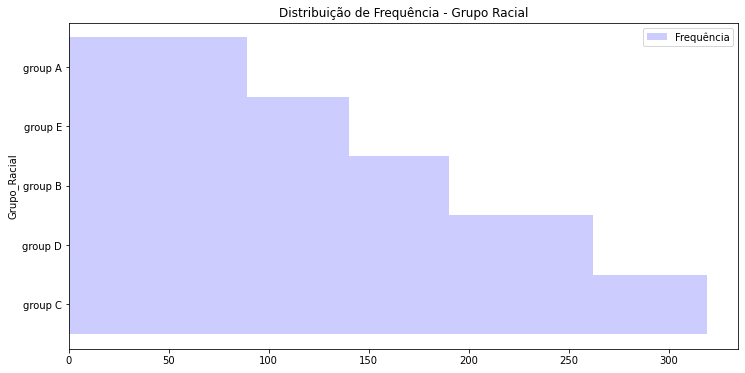

In [ ]:
#plotando frequência de cada grupo social
qtd_alunos_grupo.plot.barh(x='Grupo_Racial', y='Frequência', width= 1, color= 'blue', alpha = 0.2, figsize= (12, 6),title='Distribuição de Frequência - Grupo Racial')

## 4. Qual a quantidade de alunos de cada gênero? Existem mais alunos do gênero masculino ou feminino?

In [ ]:
display(dados['gender'].value_counts())
display(dados['gender'].isna().value_counts())

female    518
male      482
Name: gender, dtype: int64

False    1000
Name: gender, dtype: int64

Existem mais alunos do gênero feminino.

## 5. Analise as notas de matemática dos alunos de forma mais completa possível.

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
dados['math score'].mean()

66.089

In [ ]:
desvio_padrao=dados['math score'].std()
desvio_padrao

15.16308009600945

In [ ]:
variancia=dados['math score'].var() #media dos desvios.
variancia

229.91899799799796

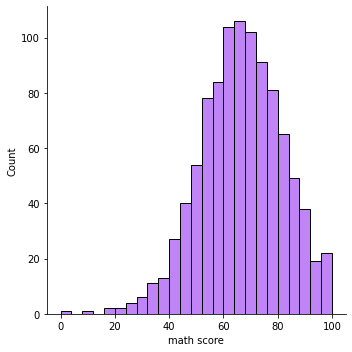

In [ ]:
hist = sns.displot(dados['math score'], color='#ad5bf4')  # identificar se a distribuição se aproxima do normal ou não.

Gráficamente é possível perceber que a distribuição se aproxima de uma normal.

<Axes: xlabel='math score'>

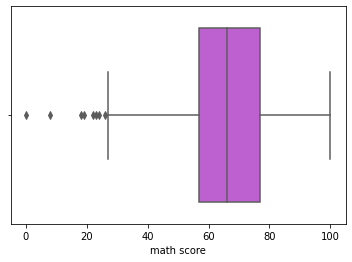

In [ ]:
sns.boxplot(x=dados["math score"],color='#ca4ee3')

In [ ]:
#Média, Mediana, máximo e desvio padrão das notas de Matemática dos alunos de acordo com raça e sexo

est_nota_mat_por_sexo_e_raca = pd.crosstab(dados['race/ethnicity'],
                                                   dados.gender,
                                                   aggfunc = {'mean', 'median', 'max', 'std'},
                                                   values = dados['math score']).round(2)

est_nota_mat_por_sexo_e_raca

max        mean        median          std       
gender         female male female   male female  male female   male
race/ethnicity                                                     
group A            92  100  58.53  63.74   57.0  63.0  14.16  14.52
group B            97   94  61.40  65.93   62.0  65.0  16.26  14.16
group C            96   98  62.03  67.61   63.0  68.0  15.01  14.09
group D            98  100  65.25  69.41   65.0  71.0  14.17  13.09
group E           100  100  70.81  76.75   71.0  78.0  16.27  14.30

## Qual a nota média de matemática dos alunos segundo o grau de escolaridade dos pais?

In [ ]:
df_mean=dados[['parental level of education', 'math score']].groupby(['parental level of education']).mean().round(2).sort_values('math score',ascending=False)
df_mean

,math score
parental level of education,
master's degree,69.75
bachelor's degree,69.39
associate's degree,67.88
some college,67.13
some high school,63.50
high school,62.14


<Axes: ylabel='parental level of education'>

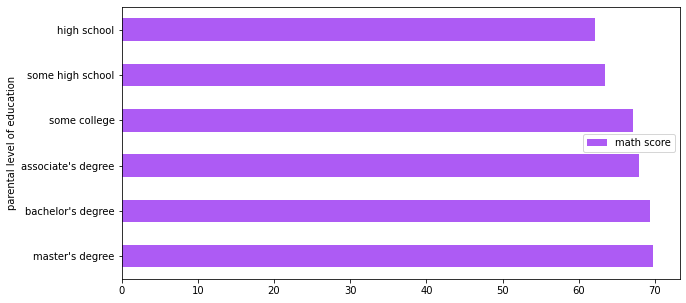

In [ ]:
df_mean.plot.barh(figsize=(10, 5),color= '#ad5bf4')

## Qual a nota média de leitura dos alunos segundo o grau de escolaridade dos pais?

In [ ]:
df_mean=dados[['parental level of education', 'reading score']].groupby(['parental level of education']).mean().round(2).sort_values('reading score',ascending=False)
df_mean

,reading score
parental level of education,
master's degree,75.37
bachelor's degree,73.00
associate's degree,70.93
some college,69.46
some high school,66.94
high school,64.70


## Qual a nota média de escrita dos alunos segundo o grau de escolaridade dos pais?

In [ ]:
df_mean=dados[['parental level of education', 'writing score']].groupby(['parental level of education']).mean().round(2).sort_values('writing score',ascending=False)
df_mean

,writing score
parental level of education,
master's degree,75.68
bachelor's degree,73.38
associate's degree,69.90
some college,68.84
some high school,64.89
high school,62.45


## Verifique graficamente a relação da nota de leitura e de escrita

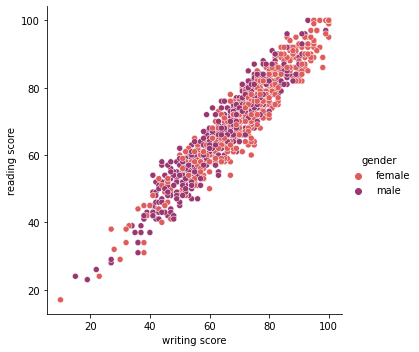

In [ ]:
sns.relplot(data=dados, x="writing score", y="reading score", hue="gender", palette = 'flare')

Ao observar o gráfico acima, percebe-se uma relação linear entre as duas variáveis. À medida que a nota de escrita aumenta, a nota de leitura também aumenta.

<Axes: >

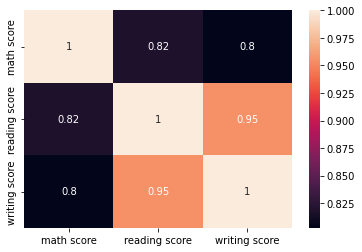

In [ ]:
correlacao = dados.corr()
sns.heatmap(correlacao, annot=True)

Como pode ser observado, também, no mapa de calor da correlação. No qual percebe-se uma alta correlação positiva entre reading score e writing score.

## Atividade extra:

Análise mais algum dado que seja interessante avaliar e represente
graficamente, através de boxplot, histogramas, barplot dentre outros
diversos de livre escolha.

In [ ]:
df_mean_le=dados[['parental level of education', 'reading score','writing score']].groupby(['parental level of education']).mean().round(2).sort_values('writing score',ascending=False)
df_mean_le

,reading score,writing score
parental level of education,,
master's degree,75.37,75.68
bachelor's degree,73.00,73.38
associate's degree,70.93,69.90
some college,69.46,68.84
some high school,66.94,64.89
high school,64.70,62.45


<Axes: ylabel='parental level of education'>

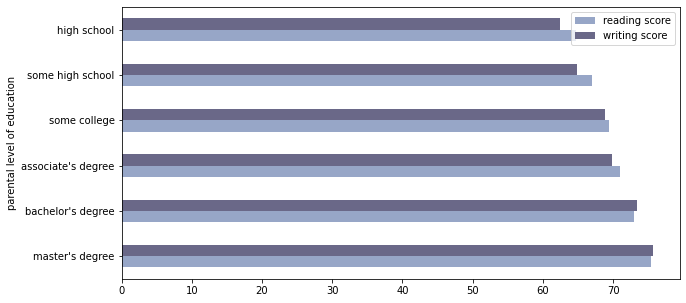

In [ ]:
df_mean_le.plot.barh(figsize=(10, 5), color={'#6a6888','#97a6c7'})

In [ ]:
100*pd.crosstab(dados['parental level of education'], dados['race/ethnicity'])/dados['race/ethnicity'].value_counts()

,group A,group B,group C,group D,group E
parental level of education,,,,,
associate's degree,15.730337,21.578947,24.451411,19.083969,27.857143
bachelor's degree,13.483146,10.526316,12.539185,10.687023,12.857143
high school,20.224719,25.263158,20.062696,16.793893,15.714286
master's degree,3.370787,3.157895,5.956113,8.778626,5.714286
some college,20.224719,19.473684,21.630094,25.572519,25.000000
some high school,26.966292,20.000000,15.360502,19.083969,12.857143


In [ ]:
100*pd.crosstab(dados['lunch'], dados['race/ethnicity'])/dados['race/ethnicity'].value_counts()

,group A,group B,group C,group D,group E
lunch,,,,,
free/reduced,40.449438,36.315789,35.736677,36.259542,29.285714
standard,59.550562,63.684211,64.263323,63.740458,70.714286


As tabelas acima, mostram que cerca de 47,19% dos pais do grupo A apresentam escolaridade até o ensino médio. Enquanto 28% dos pais dos alunos do grupo E apresentam escolaridade até o ensino médio.Verificamos também uma discrepância no tipo de almoço dos alunos de acordo com os grupos etnicos. Estes fatores listados podem indicar um certo desequilíbrio econômico entre os grupos.

# DESAFIO 2 : PROBABILIDADE E AMOSTRAGEM

## Desafio : Entendendo o consumidor.

Suponha que você trabalha em uma empresa de produtos de beleza populares e, com a pandemia, você suspeita que o perfil de seus clientes mudou. O time de marketing,pediu a sua ajuda e gostaria de entender se 1. isso de fato aconteceu e 2. quais as diferenças do novo perfil de clientes para o antigo, pois assim poderiam personalizar melhor os seus anúncios. Para isso, eles te enviaram a base de dados (desafio_01_consumidor.csv). Como você poderia ajudá-los? Para responder esse desafio:

A base de dados: desafio_01_consumidor.csv contém informações de seus clientes (anonimizados) no período pré e pós pandemia. A coluna "pré-pandemia" indica se o dado é pré-pandemia ou não, sendo 1, caso positivo ou 0 caso negativo.

### Base de Dados

In [ ]:
consumidor = pd.read_csv('desafio01consumidor.csv')

In [ ]:
consumidor.head()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


In [ ]:
consumidor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    203 non-null    object
 1   idade         203 non-null    int64 
 2   renda         203 non-null    int64 
 3   produto       203 non-null    object
 4   regiao-BR     203 non-null    object
 5   pre-pandemia  203 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.6+ KB


In [ ]:
len(consumidor['id_cliente'].unique())

82

In [ ]:
#separando cenário antes da pandemia
c_pre_pandemia = consumidor[consumidor['pre-pandemia'] == 1].drop('pre-pandemia',axis=1).reset_index(drop=True)
c_pre_pandemia.head()

,id_cliente,idade,renda,produto,regiao-BR
0,XXXXXXX72,30,7452,batom,Sudeste
1,XXXXXXX15,59,837,desodorante,Nordeste
2,XXXXXXX70,28,3231,sombra,Centro-Oeste
3,XXXXXXX99,27,5409,batom,Sul
4,XXXXXXX98,24,1142,batom,Sudeste


In [ ]:
c_pos_pandemia = consumidor[consumidor['pre-pandemia'] == 0].drop('pre-pandemia',axis=1).reset_index(drop=True)
c_pos_pandemia.head()

,id_cliente,idade,renda,produto,regiao-BR
0,XXXXXXX67,35,25959,batom,Sul
1,XXXXXXX60,35,1995,desodorante,Nordeste
2,XXXXXXX48,53,23314,antissinais,Centro-Oeste
3,XXXXXXX67,44,16693,antissinais,Centro-Oeste
4,XXXXXXX59,37,14631,base,Nordeste


### 1. Entenda a distribuição de variáveis como de idade / renda / regiao /produtos mais comprados antes e depois da pandemia

In [ ]:
c_pre_pandemia.drop(['id_cliente','regiao-BR','produto'],axis=1).describe().T.style.set_caption("Pré-Pandemia")


,count,mean,std,min,25%,50%,75%,max
idade,101.000000,39.881188,15.016183,16.000000,28.000000,37.000000,48.000000,80.000000
renda,101.000000,9180.643564,6007.677720,110.000000,4867.000000,7488.000000,13226.000000,24090.000000


In [ ]:
len(c_pre_pandemia['id_cliente'].unique())

60

In [ ]:
c_pos_pandemia.drop(['id_cliente','regiao-BR','produto'],axis=1).describe().T.style.set_caption("Pós-Pandemia")


,count,mean,std,min,25%,50%,75%,max
idade,102.000000,44.901961,13.373174,15.000000,35.250000,46.000000,54.750000,77.000000
renda,102.000000,13968.500000,5641.384444,1995.000000,10255.000000,13380.500000,16870.250000,30000.000000


In [ ]:
len(c_pos_pandemia['id_cliente'].unique())

60

De acordo com as tabelas acima verificamos um aumento médio na renda dos clientes. Em relação a idade deve-se observar que, apesar de apresentar uma média maior, deve-se levar em consideração o envelhecimento do cliente já que os dados foram colhidos em momentos diferentes.
Observou-se também que a amostra geral contém 82 ids distintos de cliente, mas as bases pré e pós pandemia apresentou 60 ids distintos de cliente.

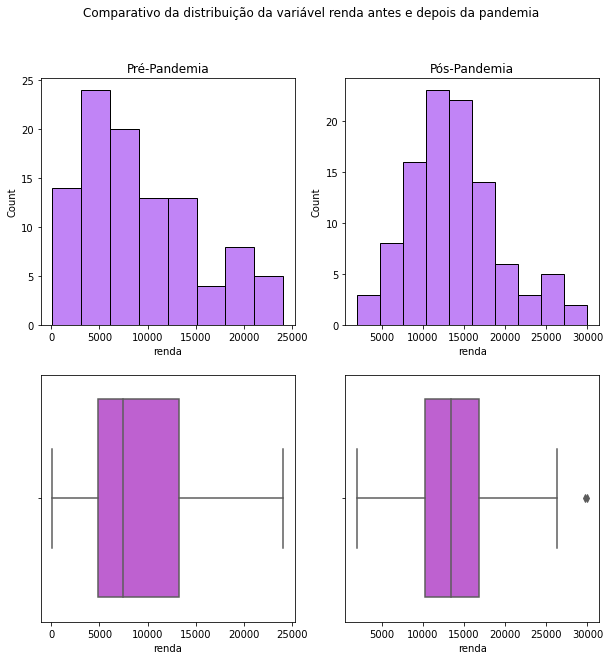

In [ ]:
figure, ax = plt.subplots(2, 2, figsize=(10,10))
figure.suptitle('Comparativo da distribuição da variável renda antes e depois da pandemia')
ax[0][0].set_title('Pré-Pandemia')
ax[0][1].set_title('Pós-Pandemia')
sns.histplot(ax= ax[0][0], data = c_pre_pandemia, x='renda', color='#ad5bf4')
sns.histplot(ax = ax[0][1],data = c_pos_pandemia,x='renda', color='#ad5bf4')
sns.boxplot(ax= ax[1][0], data = c_pre_pandemia , x='renda',color='#ca4ee3')
sns.boxplot(ax = ax[1][1],data = c_pos_pandemia, x='renda',color='#ca4ee3')
ax;


Nos gráficos acima podemos perceber que a média e mediana apresentam um aumento pós pandemia, e que a distribuição da variável apresenta-se de maneira mais equilibrada.
Também é possível observar a presença de outliers com a faixa salarial de 30000 no cenário pós-pandemia.

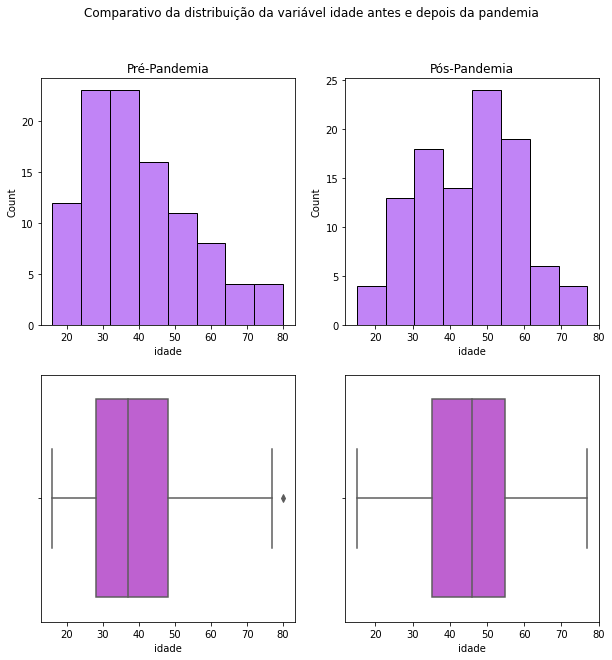

In [ ]:
figure, ax = plt.subplots(2, 2, figsize=(10,10))
figure.suptitle('Comparativo da distribuição da variável idade antes e depois da pandemia')
ax[0][0].set_title('Pré-Pandemia')
ax[0][1].set_title('Pós-Pandemia')
sns.histplot(ax= ax[0][0], data = c_pre_pandemia, x='idade', color='#ad5bf4')
sns.histplot(ax = ax[0][1],data = c_pos_pandemia,x='idade', color='#ad5bf4')
sns.boxplot(ax= ax[1][0], data = c_pre_pandemia , x='idade',color='#ca4ee3')
sns.boxplot(ax = ax[1][1],data = c_pos_pandemia, x='idade',color='#ca4ee3')
ax;


Apesar do envelhecimento esperado dos clientes após a pandemia, verificamos que houve um aumento da faixa de idade no perfil dos clientes.

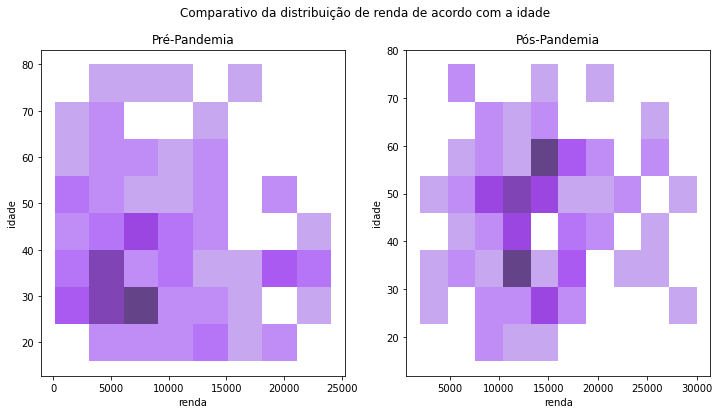

In [ ]:
figure, ax = plt.subplots(1, 2, figsize=(12,6))
figure.suptitle('Comparativo da distribuição de renda de acordo com a idade')
ax[0].set_title('Pré-Pandemia')
ax[1].set_title('Pós-Pandemia')
sns.histplot(ax=ax[0],data=c_pre_pandemia, x='renda', y='idade',color='#ad5bf4')
sns.histplot(ax=ax[1],data=c_pos_pandemia, x='renda', y='idade',color='#ad5bf4')
ax;


Explorando a visualização dos dados da biblioteca seaborn, plotamos um gráfico de distribuição bivariada onde é possível verificar a concentração dos dados com base em duas variáveis. Nos exemplos de renda e idade pré e pós pandemia, observa-se uma mudança na concentração de renda, nesse cenário, pessoas mais jovens foram afetadas e a renda de pessoas um pouco mais velhas aumentaram.

In [ ]:
c_pre_pandemia.groupby('regiao-BR')[['renda','idade']].mean().sort_values('renda').style.set_caption("Pré-Pandemia")

,renda,idade
regiao-BR,,
Nordeste,8078.730769,37.576923
Norte,8234.125000,40.250000
Sudeste,8395.666667,36.142857
Centro-Oeste,9408.588235,44.764706
Sul,10864.482759,41.689655


In [ ]:
c_pos_pandemia.groupby('regiao-BR')[['renda','idade']].mean().sort_values('renda').style.set_caption("Pós-Pandemia")

,renda,idade
regiao-BR,,
Norte,11442.777778,40.222222
Sul,13623.261905,47.047619
Sudeste,14501.277778,41.277778
Nordeste,14761.960000,44.280000
Centro-Oeste,14944.125000,49.000000


Na amostra verificamos que antes da pandemia a região com maior média salarial era a região Sul enquanto as demais regiões apresentavam médias salariais próximas. No cenário pós pandemia o que verifica-se é que a médias das rendas aumentaram, a região Sudeste, Nordeste e Centro-Oeste ultrapassaram a região sul. A região Norte apresentou o menor crescimento nesta amostra.

In [ ]:
print('Percentual de consumidores por região(Pré-pandemia):')
display(((c_pre_pandemia['regiao-BR'].value_counts()/c_pre_pandemia['regiao-BR'].value_counts().sum())*100).reset_index())
print()
print('Percentual de consumidores por região(Pós-pandemia):')
display(((c_pos_pandemia['regiao-BR'].value_counts()/c_pos_pandemia['regiao-BR'].value_counts().sum())*100).reset_index())

Percentual de consumidores por região(Pré-pandemia):


,index,regiao-BR
0,Sul,28.712871
1,Nordeste,25.742574
2,Sudeste,20.792079
3,Centro-Oeste,16.831683
4,Norte,7.920792



Percentual de consumidores por região(Pós-pandemia):


,index,regiao-BR
0,Sul,41.176471
1,Nordeste,24.509804
2,Sudeste,17.647059
3,Norte,8.823529
4,Centro-Oeste,7.843137


Acima vemos que após a pandemia houve um aumento considerável do consumo no Sul do país. E uma queda acentuada no Centro-Oeste. Pode-se considerar isso a partir das tabelas pois o tamanho das amostras de pré e pós pandemia é praticamente o mesmo.

In [ ]:
c_pre_pandemia["produto"].value_counts()

batom          61
desodorante    20
antissinais     9
sombra          4
perfume         4
base            3
Name: produto, dtype: int64

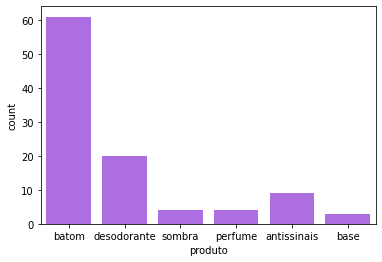

In [ ]:
ax = sns.countplot(data= c_pre_pandemia, x = 'produto', color='#ad5bf4')

In [ ]:
c_pos_pandemia["produto"].value_counts()

desodorante    46
antissinais    20
batom          15
sombra          9
perfume         8
base            4
Name: produto, dtype: int64

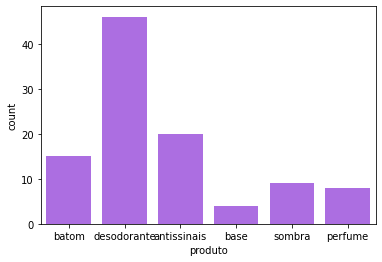

In [ ]:
sns.countplot(data= c_pos_pandemia, x = 'produto',color='#ad5bf4');

In [ ]:
pd.crosstab(index=c_pre_pandemia['produto'], columns=c_pre_pandemia['regiao-BR'])

regiao-BR,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
produto,,,,,
antissinais,1,0,8,0,0
base,3,0,0,0,0
batom,0,11,0,21,29
desodorante,5,15,0,0,0
perfume,4,0,0,0,0
sombra,4,0,0,0,0


In [ ]:
pd.crosstab(index=c_pos_pandemia['produto'], columns=c_pos_pandemia['regiao-BR'])

regiao-BR,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
produto,,,,,
antissinais,8,3,9,0,0
base,0,4,0,0,0
batom,0,0,0,14,1
desodorante,0,1,0,4,41
perfume,0,8,0,0,0
sombra,0,9,0,0,0


Nas tabelas e gráficos acima percebe-se uma mudança no comportamento de consumo. Inclusive é visível uma variação no comportamento de compra nas regiões do país.

### 2. Você notou diferenças nítidas pré e pós pandemia? Como você poderia provar estatisticamente que essas diferenças são significativas ? (pergunta extra)

### 3. Suponha agora que os dados recebidos são somente uma amostra da sua população total de clientes. Suponha que a sua "população" de clientes verdadeira é de 100000. Qual o tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A base informada é suficiente?

Fórmula para definir tamanho da amostra onde a população é finita e com desvio padrão desconhecido:

$$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Onde:

$N$ = tamanho da população

$z$ = variável normal padronizada

$s$ = desvio padrão amostral

$e$ = erro inferencial

In [ ]:
amostra = consumidor[['renda','idade']]

In [ ]:
N= 100000    #tamanho da população
e1 = 0.02*(amostra.mean())    #primeiro erro inferencial proposto
e2 = 0.1*(amostra.mean())     #segundo erro inferencial proposto
confianca = 0.95
s = amostra.std()             #desvio da amostra

In [ ]:
z = norm.ppf(0.975)
z

1.959963984540054

In [ ]:
n1 = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e1**2) * (N - 1)))
print("Tamanho da amostra necessária para avaliar a variável renda:",n1[0].round())
print("Tamanho da amostra necessária para avaliar a variável iddade:",n1[1].round())

Tamanho da amostra necessária para avaliar a variável renda: 2751.0
Tamanho da amostra necessária para avaliar a variável iddade: 1095.0


In [ ]:
len(amostra) >= n1

renda    False
idade    False
dtype: bool

**Com 95% de confiança e 2% de margem de erro, a base informada é suficiente?**

Conclusão:

1.   Amostra da variável renda não é suficiente
2.   Amostra da variável idade não é suficiente


### E com uma margem de erro de 10%?

In [ ]:
n2 = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e2**2) * (N - 1)))
print("Tamanho da amostra necessária para avaliar a variável renda:",n2[0].round())
print("Tamanho da amostra necessária para avaliar a variável iddade:",n2[1].round())

Tamanho da amostra necessária para avaliar a variável renda: 113.0
Tamanho da amostra necessária para avaliar a variável iddade: 44.0


In [ ]:
len(amostra) >= n2

renda    True
idade    True
dtype: bool


**Com 95% de confiança e 10% de margem de erro, a base informada é suficiente?**

Conclusão:

1.   Amostra da variável renda é suficiente
2.   Amostra da variável idade é suficiente

## Desafio: Determinando o Estoque de Segurança

Suponha agora que você trabalha em uma empresa de produtos perecíveis, como
Danone ou Nestlé. Para a empresa, é muito importante que a sua política de estoque seja eficiente. É necessário manter um estoque de segurança em todos os produtos (acima da previsão de vendas), pois, caso contrário, as pessoas podem não encontrar os produtos no supermercado. Mas, ao mesmo tempo, se o estoque estiver em excesso, isso pode representar um grande custo. Os produtos podem não ser comprados, e consequentemente, jogados fora, o que na indústria se chama
"desova". Para achar o equilíbrio perfeito, o gerente de vendas pediu a ajuda a você, do time de análise de dados, e ele gostaria de saber qual o estoque de segurança ideal.

OBS: Para responder esse desafio, antes confira alguns conceitos importantes na indústria que estão disponíveis no PDF.

O gerente de vendas te enviou o arquivo desafio_02_estoque.csv contendo os
dados de vendas de iogurte e o lead time de 2015 a 2022.

### Base de dados

In [ ]:
dados_d2 = pd.read_csv('desafio_02_estoque.csv')

In [ ]:
dados_d2.head()

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5


In [ ]:
dados_d2.rename(columns={'vendas-iogurte': 'vendas_iogurte'}, inplace = True)
dados_d2.rename(columns={'lead-time': 'lead_time'}, inplace = True)

### 1. Analise os dados das vendas e do lead time. Eles seguem uma distribuição normal? Que características você identificou para chegar a essa conclusão?

In [ ]:
media_vendas = np.mean(dados_d2.vendas_iogurte) # média das vendas
np.ceil(media_vendas)

5000.0

<Axes: xlabel='vendas_iogurte', ylabel='Count'>

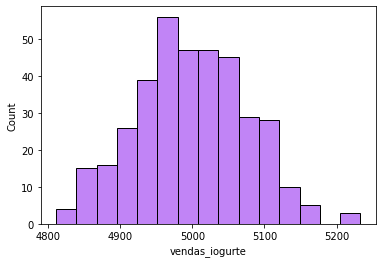

In [ ]:
sns.histplot(data=dados_d2, x="vendas_iogurte",color='#ad5bf4')  # distribuição das vendas

In [ ]:
media_lead_time = np.mean(dados_d2.lead_time) # média do tempo de entrega
int(media_lead_time)

5

<Axes: xlabel='lead_time', ylabel='Count'>

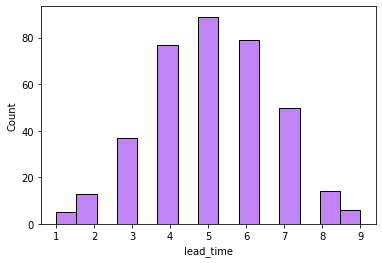

In [ ]:
sns.histplot(data=dados_d2, x="lead_time",color = '#ad5bf4')  # distribuição lead-time

### 2. Assuma que:

a. Os dados seguem uma distribuição normal.

b. O time de vendas utilize para o produto em questão o nível de serviço
de 99,87%

c. O produto não tem sazonalidade (todos os meses vende valores próximos) e a demanda média passada é uma boa estimativa para a projetada, de acordo com o time de planejamento de demanda.

Calcule, com os dados fornecidos, o estoque de segurança desejado.

In [ ]:
d = media_vendas
t = media_lead_time
sigma_d = dados_d2.vendas_iogurte.std()
sigma_t = dados_d2.lead_time.std()

In [ ]:
z = norm.ppf(0.9987)
z

3.011453758499792

Considerando que o produto é perecível, escolheu-se a fórmula completa para determinar o estoque de segurança.

In [ ]:
estoque_seguranca = z * np.sqrt( ( (sigma_d ** 2) * t )  + ( (sigma_t ** 2) * (d ** 2) ) ) # Fórmula Completa
np.ceil(estoque_seguranca)

23774.0

RESPOSTA: Para o cenário descrito, o estoque de segurança deverá ser de 23774

# DESAFIO 3 : TESTES DE HIPÓTESES

## Desafio 1: Cosméticos

Suponha que você trabalha em uma empresa do ramo de cosméticos ou beleza. O
Time de produtos dessa empresa está interessado criar novos batons com maior
durabilidade. Para isso estão testando 3 diferentes fórmulas para irem a mercado.
Com isso, a empresa fez uma pesquisa com varias voluntárias e populou a base de
dados (desafio_01_cosmeticos.csv) contendo as seguintes informacoes:

● id_produto: código identificador do produto, com a fórmula utilizada. Para
diferenciarmos se se trata do batom com a fórmula 1, 2 ou 3

● id_voluntária: código identificador da voluntária que utilizou o produto.

● durabilidade: quanto tempo o produto durou em horas.

● idade: idade da voluntária

● exposicao_sol: variável que indica 1 se a voluntária se expos ao sol 0 caso
contrário.


De posse dessas informacoes, o time de produtos solicitou aos analistas de dados da empresa as seguintes perguntas a serem respondidas:

### Base de Dados

In [ ]:
cosmetico = pd.read_csv('desafio_01_cosmeticos.csv')
cosmetico.head(10)

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
0,1,1,12,40,1
1,2,2,5,36,0
2,1,3,19,47,0
3,1,4,14,36,1
4,1,5,17,46,1
5,1,6,14,56,1
6,1,7,12,29,1
7,1,8,13,52,1
8,1,9,18,27,0
9,2,10,7,19,1


In [ ]:
#verificando os tipos de dados e se há dados faltantes nas colunas
cosmetico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id_produto     300 non-null    int64
 1   id_voluntária  300 non-null    int64
 2   durabilidade   300 non-null    int64
 3   idade          300 non-null    int64
 4   exposicao_sol  300 non-null    int64
dtypes: int64(5)
memory usage: 11.8 KB


In [ ]:
#os tipos do produto avaliado
cosmetico['id_produto'].unique()

array([1, 2, 3])

In [ ]:
cosmetico['id_voluntária'].unique()   #verifica-se que cada entrada representa 1 voluntária.

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
len(cosmetico['id_voluntária'].unique())  #verifica-se que cada entrada representa 1 voluntária.

300

In [ ]:
cosmetico[['durabilidade']].describe().T

,count,mean,std,min,25%,50%,75%,max
durabilidade,300.0,17.133333,10.942945,5.0,9.0,14.0,20.0,48.0


<Axes: xlabel='durabilidade', ylabel='Count'>

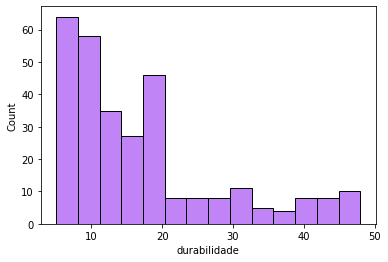

In [ ]:
sns.histplot(data = cosmetico, x ='durabilidade',color = '#ad5bf4')

In [ ]:
#a seguir verificamos o tamanho dos grupos nas amostras

<Axes: xlabel='id_produto', ylabel='count'>

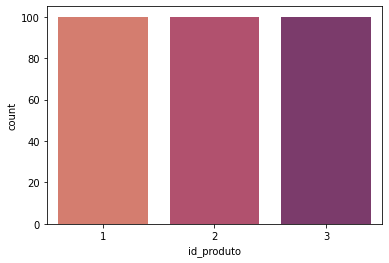

In [ ]:
sns.countplot(data= cosmetico, x = 'id_produto',palette ="flare")

<Axes: xlabel='exposicao_sol', ylabel='count'>

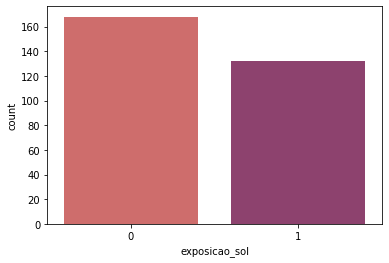

In [ ]:
sns.countplot(data= cosmetico, x = 'exposicao_sol',palette ="flare")

<Axes: xlabel='id_produto', ylabel='count'>

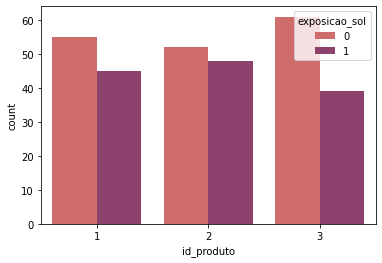

In [ ]:
sns.countplot(data= cosmetico, x = 'id_produto',hue='exposicao_sol',palette ="flare")

In [ ]:
#perfil de idade das voluntárias:
cosmetico[['idade']].describe().T

,count,mean,std,min,25%,50%,75%,max
idade,300.0,36.886667,12.625841,18.0,26.0,36.0,48.0,60.0


<Axes: xlabel='idade', ylabel='durabilidade'>

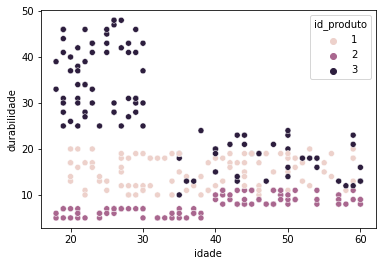

In [ ]:
sns.scatterplot(data=cosmetico, x='idade', y = 'durabilidade',hue = 'id_produto')

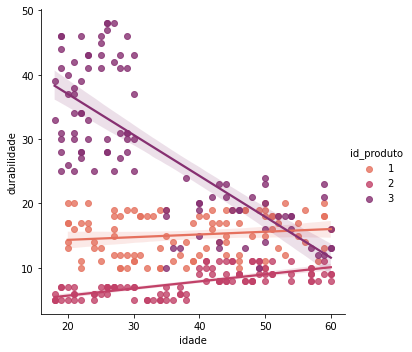

In [ ]:
#verificando a tendêcia da durabilidade de cada produto de acordo com a idade
sns.lmplot(data=cosmetico, x='idade', y = 'durabilidade',hue = 'id_produto',palette ="flare")

### 1 - Existe diferença estatisticamente significativa na durabilidade dos batons com formulas diferentes?

<Axes: xlabel='durabilidade', ylabel='Count'>

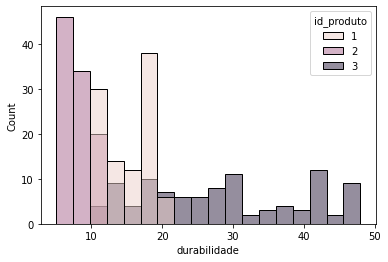

In [ ]:
sns.histplot(data = cosmetico, x = 'durabilidade',hue='id_produto',bins = 18)

In [ ]:
table1 = cosmetico.groupby(['id_produto'])['durabilidade'].mean().reset_index()
table1 = table1.rename(columns = {'durabilidade': 'durabilidade media'}).style.hide_index()
table1

<ipython-input-81-3c7d8cf463b6>:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  table1 = table1.rename(columns = {'durabilidade': 'durabilidade media'}).style.hide_index()


id_produto,durabilidade media
1,15.110000
2,7.770000
3,28.520000


In [ ]:
table2 = cosmetico.groupby(['id_produto'])['durabilidade'].std().reset_index()
table2 = table2.rename(columns = {'durabilidade': 'desvio padrao da durabilidade'}).style.hide_index()
table2

<ipython-input-82-1871774a2a04>:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  table2 = table2.rename(columns = {'durabilidade': 'desvio padrao da durabilidade'}).style.hide_index()


id_produto,desvio padrao da durabilidade
1,3.284168
2,1.942897
3,11.110537


<Axes: xlabel='id_produto', ylabel='durabilidade'>

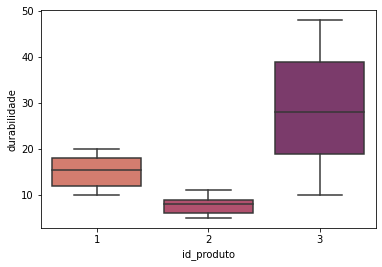

In [ ]:
sns.boxplot(data = cosmetico, y = 'durabilidade', x = 'id_produto',palette ="flare")

Poderíamos fazer a avaliação se há diferença estatísticamente significativa na durabilidade, utilizando o teste de Kruskal-Wallis, no entanto, como queremos fazer uma análise comparativa. Optou-se então por aplicar o teste de Mann-Whitney par a par.


Observamos acima que a amostra apresenta as seguintes características:
- O produto 3 apresenta uma durabilidade média maior que o produto 1 e 2
- O produto 2 é o que apresenta menor durabilidade média e menor variabilidade desta durabilidade
- Verificamos que os grupos não seguem uma distribuição normal em relação a sua durabilidade



Então. sendo mi a durabilidade média do produto i, o que iremos testar a seguir é se:
- m2 < m1
- m1 < m3
Para isso utilizaremos testes de hipoteses não paramétrico devido a não normalidade da distribuição. Considerando as amostras independentes o teste escolhido para ser aplicado foi o de  Mann-Whitney.

In [ ]:
#testando se há diferença da durabilidade entre m1 e m2
#H0: m2=m1
#H1: m2<m1
M1 , p_valor1 = mannwhitneyu(cosmetico[cosmetico['id_produto']==2]['durabilidade'], cosmetico[cosmetico['id_produto']==1]['durabilidade'], alternative='less')

In [ ]:
print(M1,"p_valor: ",p_valor1)
if p_valor1 < 0.05:
  print("Rejeitar H0")
else:
  print("Aceitar H0")

230.0 p_valor:  7.331071871855705e-32
Rejeitar H0


In [ ]:
#testando se há diferença da durabilidade entre m1 e m2
#H0: m1=m3
#H1: m1<m3
M2 , p_valor2 = mannwhitneyu(cosmetico[cosmetico['id_produto']==1]['durabilidade'], cosmetico[cosmetico['id_produto']==3]['durabilidade'], alternative='less') #H0: m1=m3 H1: m1<m3

In [ ]:
print(M2,p_valor2)
if p_valor2 < 0.05:
  print("Rejeitar H0")
else:
  print("Aceitar H0")

1320.0 1.0837122304623704e-19
Rejeitar H0


Pelo teste de Mann-Whitney podemos afirmar que o produto 3 tem uma durabilidade superior ao produto 1 e que este tem uma durabilidade superior ao produto 2.

### 2 - Essa diferenca persiste ou nao quando a voluntária se expoe ao sol? E com relacao a idade?

In [ ]:
#verificando o comportamento da durabilidade média de cada produto de acordo com a exposição ao sol:
table3 = cosmetico.groupby(['exposicao_sol','id_produto'])['durabilidade'].mean().reset_index()
table3 = table3.rename(columns = {'durabilidade': 'durabilidade media'})
table3.pivot(index='id_produto', columns='exposicao_sol', values='durabilidade media')

exposicao_sol,0,1
id_produto,,
1,17.727273,11.911111
2,7.961538,7.562500
3,33.901639,20.102564


<Axes: xlabel='exposicao_sol', ylabel='durabilidade'>

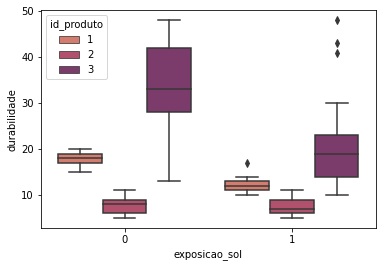

In [ ]:
sns.boxplot(data = cosmetico,x = 'exposicao_sol', y = 'durabilidade', hue ='id_produto',palette ="flare")

Observamos acima que a amostra apresenta as seguintes características, independente da exposição ao sol:
- O produto 3 apresenta uma durabilidade média maior que o produto 1 e 2
- O produto 2 é o que apresenta menor durabilidade média e menor variabilidade desta durabilidade
- Verificamos que os grupos não seguem uma distribuição normal em relação a sua durabilidade


Iremos agora aplicar os mesmos testes para cada produto exposto e não exposto ao sol, e verificar se m3 > m1 >m2

In [ ]:
#separando a amostra por produto:
produto1 = cosmetico[cosmetico['id_produto']==1]
produto2 = cosmetico[cosmetico['id_produto']==2]
produto3 = cosmetico[cosmetico['id_produto']==3]

In [ ]:
#testando a hipotese para o produto 2 e 1 expostos ao sol
#H0: m2=m1
#H1: m2<m1
M3 , p_valor3 = mannwhitneyu(produto2[produto2['exposicao_sol']==1]['durabilidade'], produto1[produto1['exposicao_sol']==1]['durabilidade'], alternative='less')

In [ ]:
print(M3,"\np-valor:",p_valor3)
if p_valor3 < 0.05:
  print("Rejeitar H0")
else:
  print("Aceitar H0")

80.0 
p-valor: 5.3117505285827336e-15
Rejeitar H0


In [ ]:
#testando a hipotese para o produto 1 e 3 expostos ao sol
#H0: m1=m3
#H1: m1<m3
M4 , p_valor4 = mannwhitneyu(produto1[produto1['exposicao_sol']==1]['durabilidade'], produto3[produto3['exposicao_sol']==1]['durabilidade'], alternative='less')

In [ ]:
print(M4,"\np-valor:",p_valor4)
if p_valor4 < 0.05:
  print("Rejeitar H0")
else:
  print("Aceitar H0")


190.5 
p-valor: 2.925257487526298e-10
Rejeitar H0


In [ ]:
#testando a hipotese para o produto 2 e 1 sem exposição ao sol
#H0: m2=m1
#H1: m2<m1
M5 , p_valor5 = mannwhitneyu(produto2[produto2['exposicao_sol']==0]['durabilidade'], produto1[produto1['exposicao_sol']==0]['durabilidade'], alternative='less') #H0: m1=m2 H1: m2<m1


In [ ]:
print(M5,"\np-valor:",p_valor5)
if p_valor5 < 0.05:
  print("Rejeitar H0")
else:
  print("Aceitar H0")

0.0 
p-valor: 1.809645989176755e-19
Rejeitar H0


In [ ]:
#testando a hipotese para o produto 3 e 1 sem exposição ao sol
#H0: m1=m3
#H1: m1<m3
M6 , p_valor6 = mannwhitneyu(produto1[produto1['exposicao_sol']==0]['durabilidade'], produto3[produto3['exposicao_sol']==0]['durabilidade'], alternative='less') #H0: m1=m2 H1: m2<m1

In [ ]:
print(M6,"\np-valor:",p_valor6)
if p_valor6 < 0.05:
  print("Rejeitar H0")
else:
  print("Aceitar H0")

177.5 
p-valor: 4.5567574218402525e-17
Rejeitar H0


Verificamos pelos testes aplicados que o produto 3 tem uma durabilidade média superior aos demais produtos

Agora verifiquemos em relação a idade.
No início quando exploramos a durabilidade do produto de acordo com a idade das voluntárias verificou-se que a durabilidade tem um comportamento no grupo de mulheres até 30 anos e outro no grupo de mulheres mais 30.
Para verificar melhor o comportamento da durabilidade desses grupos criaremos uma nova coluna com uma coluna : 'flag_mais30'
em que 0 representa mulheres de 18 a 30 anos
e 1 representa mulheres acima de 30 anos.

In [ ]:
#criação da coluna flag_mais30
cosmetico['flag_mais30']= cosmetico['idade']

for i in range(len(cosmetico['idade'])):
  if cosmetico['idade'][i]<=30 :
    cosmetico['flag_mais30'][i]=0
  else:
    cosmetico['flag_mais30'][i]=1

cosmetico.head(10)

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol,flag_mais30
0,1,1,12,40,1,1
1,2,2,5,36,0,1
2,1,3,19,47,0,1
3,1,4,14,36,1,1
4,1,5,17,46,1,1
5,1,6,14,56,1,1
6,1,7,12,29,1,0
7,1,8,13,52,1,1
8,1,9,18,27,0,0
9,2,10,7,19,1,0


In [ ]:
table4 = cosmetico.groupby(['flag_mais30','id_produto'])['durabilidade'].mean().reset_index()
table4 = table4.rename(columns = {'durabilidade': 'desvio padrao da durabilidade'})
table4.pivot(index='id_produto', columns='flag_mais30', values='desvio padrao da durabilidade')

flag_mais30,0,1
id_produto,,
1,14.636364,15.343284
2,6.193548,8.478261
3,35.950000,17.375000


<Axes: xlabel='flag_mais30', ylabel='durabilidade'>

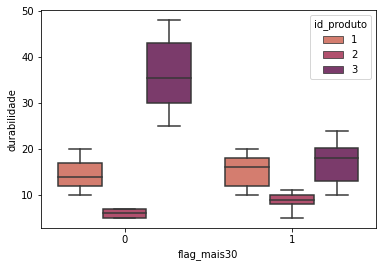

In [ ]:
sns.boxplot(data = cosmetico, y='durabilidade',x= 'flag_mais30', hue ='id_produto',palette ="flare")

Verificamos acima que, de acordo com o grupo de idade, a durabilidade dos produtos se aproximam bastante apesar de parecerem manter a diferença.
Verifiquemos se podemos confirmar esse comportamento a partir da aplicação dos testes a seguir:


In [ ]:
#separando a amostra por produto:
produto1 = cosmetico[cosmetico['id_produto']==1]
produto2 = cosmetico[cosmetico['id_produto']==2]
produto3 = cosmetico[cosmetico['id_produto']==3]

In [ ]:
#testando a hipotese para o produto 2 e 1 para o grupo de idade até 30 anos
#H0: m2=m1
#H1: m2<m1
M7 , p_valor7 = mannwhitneyu(produto2[produto2['flag_mais30']==0]['durabilidade'], produto1[produto1['flag_mais30']==0]['durabilidade'], alternative='less')

In [ ]:
print(M7,p_valor7)

0.0 2.1359173656378605e-12


In [ ]:
#testando a hipotese para o produto 1 e 3 para o grupo de idade até 30 anos
#H0: m1=m3
#H1: m1<m3
M8 , p_valor8 = mannwhitneyu(produto1[produto1['flag_mais30']==0]['durabilidade'], produto3[produto3['flag_mais30']==0]['durabilidade'], alternative='less')

In [ ]:
print(M8,p_valor8)

0.0 9.136735715389103e-16


In [ ]:
#testando a hipotese para o produto 2 e 1 para o grupo de idade + 30 anos
#H0: m2=m1
#H1: m2<m1
M9 , p_valor9 = mannwhitneyu(produto2[produto2['flag_mais30']==1]['durabilidade'], produto1[produto1['flag_mais30']==1]['durabilidade'], alternative='less')

In [ ]:
print(M9,p_valor9)

138.0 1.0250151706779758e-21


In [ ]:
#testando a hipotese para o produto 1 e 3 para o grupo de idade + 30 anos
#H0: m1=m3
#H1: m1<m3
M10 , p_valor10 = mannwhitneyu(produto1[produto1['flag_mais30']==1]['durabilidade'], produto3[produto3['flag_mais30']==1]['durabilidade'], alternative='less')

In [ ]:
print(M10,p_valor10)

923.5 0.0035507768887152224


### 3- Qual fórmula de batom voce indicaria para consumidores que buscam maior durabilidade e exposicao ao sol?

Verificamos que os testes avaliaram para uma significancia de 5% que o produto 3 apresenta uma durabilidade maior em todos os cenários.

## Desafio 2

Imagine que voce trabalha em uma empresa do setor alimentício, e o preço de determinado produto, um novo picolé, tem uma distribuição normal com média igual a R 7,85 e desvio padrão igual a R 3,32. Suspeita-se que devido ao verão, em determinadas localidades de praia o preco do picolé esteja mais caro. Para verificar se esse efeito é estatisticamente significativo, contactaram voce, analista de dados. Suponha que para realizar essa análise voce tenha dados de 45 lojas em cidades do litoral, escolhidas aleatoriamente. E constatou que o preço médio do picolé nessas cidades é de R$11,52.

###1. Voce pode concluir que existe diferenca de precos estatisticamente relevante com 5% de significancia?

------------------- Hipóteses ---------------------

H0: Não existe uma diferença de preços

H1: Existe uma diferença de preços

In [ ]:
media = 7.85
media_amostra= 11.52
n=45

In [ ]:
significancia = 0.05
confianca = 1 - significancia

In [ ]:
probabilidade = (0.5 + (confianca / 2))
probabilidade

0.975

In [ ]:
z_alpha_2 = norm.ppf(probabilidade)  #intervalo de confiança
z_alpha_2

1.959963984540054

In [ ]:
 desvio_pd = 3.32

In [ ]:
z = (media_amostra - media) / (desvio_pd / np.sqrt(n))
z

7.415394106106231

In [ ]:
z>=z_alpha_2

True

In [ ]:
P_valor = 2 * (1 - norm.cdf(z))
P_valor

1.212363542890671e-13

In [ ]:
if P_valor <= significancia:
   print("Rejeitar H0")
else:
  print("Aceitar H0")

Rejeitar H0


In [ ]:
if z <= -z_alpha_2 or z >= z_alpha_2:
  print("Rejeitar H0")
else:
  print("Aceitar H0")

Rejeitar H0


**CONCLUSÃO**

Sim, existe uma diferença de preços estatisticamente relevante com 5% de significância.

### 2. Qual o valor da variável teste, o intervalo de confianca e o p-valor?

In [ ]:
print("Valor da variável teste:", z)

Valor da variável teste: 7.415394106106231


In [ ]:
print('P_valor:', P_valor)

P_valor: 1.212363542890671e-13


In [ ]:
intervalo_confianca = [media_amostra  - z_alpha_2 * (desvio_pd / np.sqrt(n)), media_amostra + z_alpha_2 * (desvio_pd / np.sqrt(n))]
print("Intervalo de Confiança: ",intervalo_confianca)

Intervalo de Confiança:  [10.549981721761917, 12.490018278238082]


# DESAFIO 4 : CORRELAÇÃO E REGRESSÃO

## Base de Dados

In [ ]:
dados = pd.read_csv('desafio_01_preco_imoveis.csv')

In [ ]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


## Desafio Análise de Correlação:
Suponha que você trabalha em uma empresa do setor imobiliário. Para essa empresa é
muito importante precificar corretamente o imóvel, caso contrário, os corretores
podem perder a venda. Como parte do time de dados, você é responsável por analisar
os principais fatores que podem afetar o preço dos imóveis. Para isso, eles te enviaram
a base de dados (desafio_01_preco_imoveis.csv). Como você poderia ajudá-los?
Para responder esse desafio: A base de dados: desafio_01_preco_imoveis.csv contém as
seguintes informações:

● id : código identificador do imóvel

● date: data em que o imóvel foi cadastrado

● price: preço do imóvel

● bedrooms: número de quartos

● bathrooms: número de banheiros

● sqft_living: tamanho do imóvel (dentro da casa)

● sqft_lot: tamanho do lote / terreno

● floors: andares

● waterfront: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso
contrário.

● view: indica o número de quartos com vista.

● condition: condição do imóvel, escala de 1 a 5

● grade: nota do imóvel

● sqft_above: tamanho da casa acima do solo (excluindo porão)

● sqft_basement: tamanho do porão

● yr_built: ano em que a casa foi construída

● yr_renovated: ano em que a casa foi renovada

● zipcode: "CEP" do imóvel

● lat: latitude do imóvel

● long: longitude do imóvel



## 1 - Analise a correlação de todas as variáveis com o preço do imóvel. Quais variáveis são mais correlacionadas? Quais são menos correlacionadas?

In [ ]:
correlacao = dados.corr()
correlacao

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500


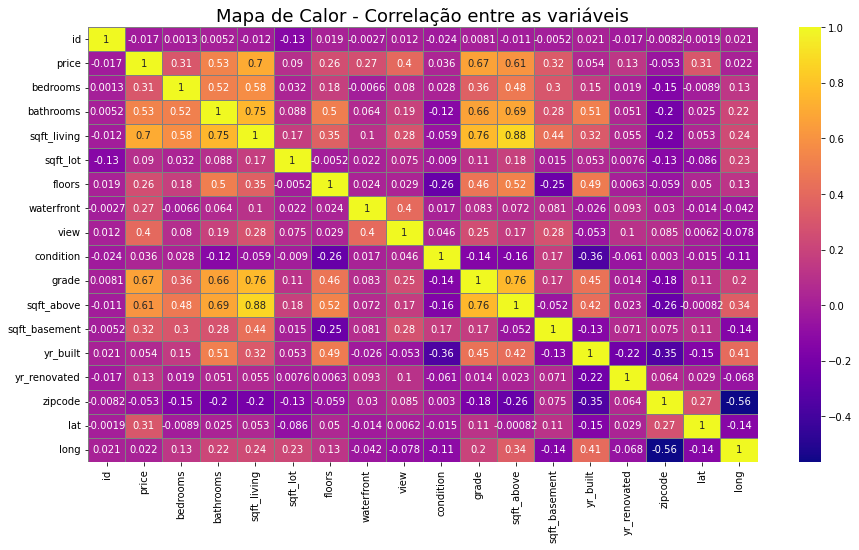

In [ ]:
ax = sns.heatmap(correlacao, annot=True, cmap='plasma', linecolor='gray', linewidths=1)
ax.figure.set_size_inches(15,8)
ax.set_title("Mapa de Calor - Correlação entre as variáveis", fontsize=18)
ax;

In [ ]:
corr_price = correlacao.price.reset_index().sort_values(['price'], ascending=[False])
corr_price

,index,price
1,price,1.000000
4,sqft_living,0.702035
10,grade,0.667434
11,sqft_above,0.605567
3,bathrooms,0.525138
8,view,0.397293
12,sqft_basement,0.323816
2,bedrooms,0.308350
16,lat,0.307003
7,waterfront,0.266369


## 2 - Para as top 5 variáveis mais correlacionadas com o preço:

1. plote as suas distribuições (histograma e boxplot)

> a) TOP 1 - sqft_living (tamanho do imóvel)

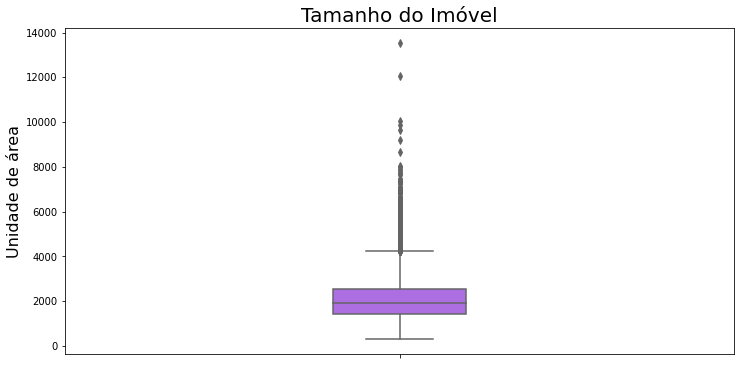

In [ ]:
# boxplot - variável 1 (sqft_living)
ax = sns.boxplot(data=dados, y=dados['sqft_living'],orient='v', width=0.2,color = '#ad5bf4')
ax.figure.set_size_inches(12,6)
ax.set_title('Tamanho do Imóvel', fontsize=20)
ax.set_ylabel('Unidade de área', fontsize=16)
ax;

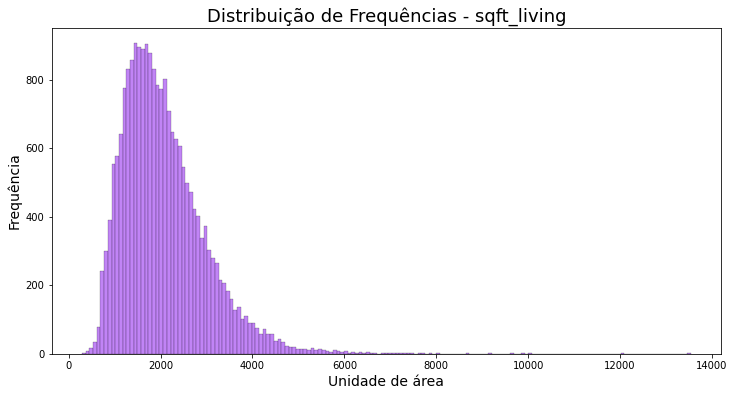

In [ ]:
# histograma - variável 1 (sqft_living)
ax = sns.histplot(data= dados, x ='sqft_living', kde = False,color = '#ad5bf4')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - sqft_living', fontsize=18)
ax.set_xlabel('Unidade de área', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)
ax;

In [ ]:
dados[["sqft_living"]].describe().round(2)

,sqft_living
count,21613.00
mean,2079.90
std,918.44
min,290.00
25%,1427.00
50%,1910.00
75%,2550.00
max,13540.00


> b) TOP 2 - grade (nota do imóvel)

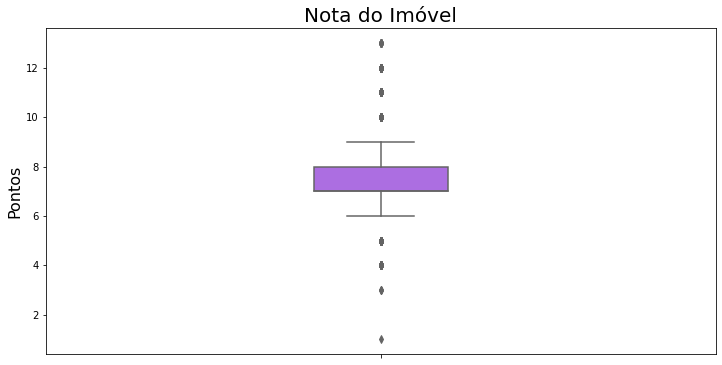

In [ ]:
# boxplot - variável 2 (grade)
ax = sns.boxplot(data=dados,y='grade', orient='v', width=0.2,color = '#ad5bf4')
ax.figure.set_size_inches(12,6)
ax.set_title('Nota do Imóvel', fontsize=20)
ax.set_ylabel('Pontos', fontsize=16)
ax;

In [ ]:
dados[["grade"]].describe().round(2)

,grade
count,21613.00
mean,7.66
std,1.18
min,1.00
25%,7.00
50%,7.00
75%,8.00
max,13.00


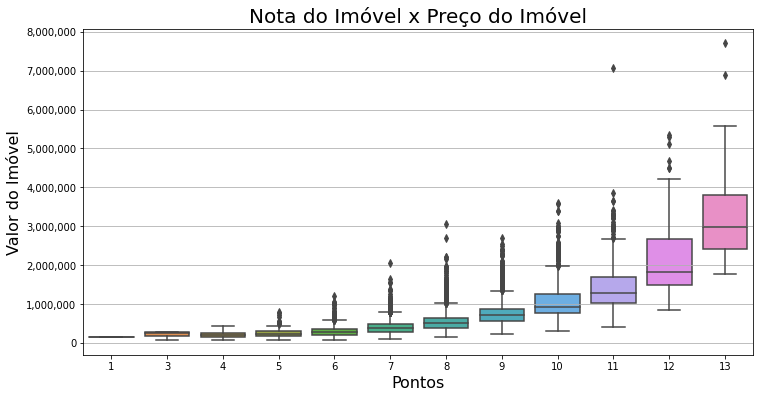

In [ ]:
import matplotlib
ax = sns.boxplot(data=dados, x ='grade', y='price')
ax.figure.set_size_inches(12,6)
ax.set_title('Nota do Imóvel x Preço do Imóvel', fontsize=20)
ax.set_ylabel('Valor do Imóvel', fontsize=16)
ax.set_xlabel('Pontos', fontsize=16)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.grid(True) # Show the horizontal gridlines

In [ ]:
dados[["grade"]].value_counts()

grade
7        8981
8        6068
9        2615
6        2038
10       1134
11        399
5         242
12         90
4          29
13         13
3           3
1           1
dtype: int64

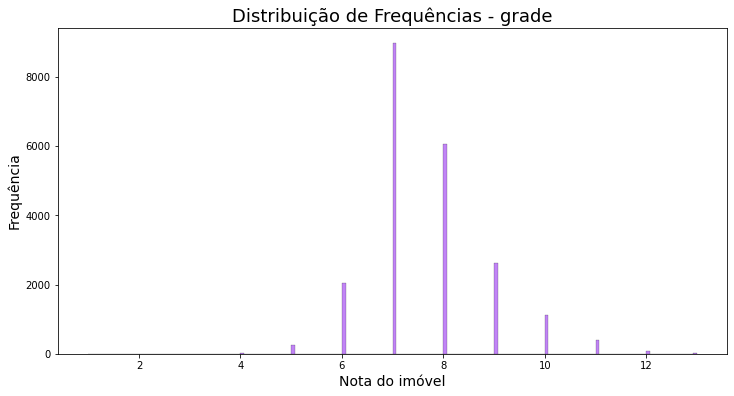

In [ ]:
# histograma - variável 2 (grade)
ax = sns.histplot(data=dados, x='grade', kde = False,color = '#ad5bf4')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - grade', fontsize=18)
ax.set_xlabel('Nota do imóvel', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)
ax;

> c) TOP 3 - sqft_above (tamanho do imóvel acima do nível do solo)

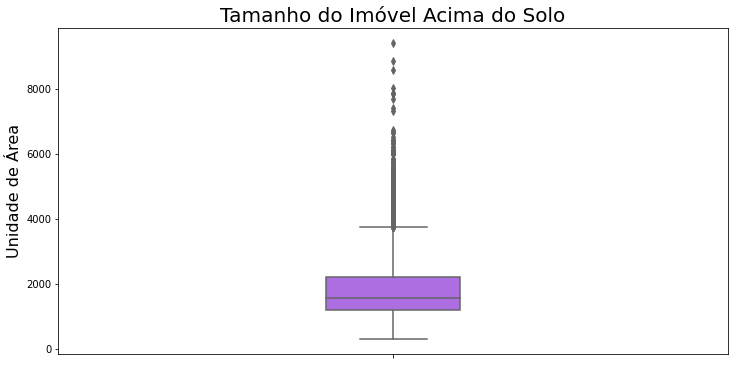

In [ ]:
# boxplot - variável 3 (sqft_above)
ax = sns.boxplot(data=dados,y='sqft_above', orient='v', width=0.2,color = '#ad5bf4')
ax.figure.set_size_inches(12,6)
ax.set_title('Tamanho do Imóvel Acima do Solo', fontsize=20)
ax.set_ylabel('Unidade de Área', fontsize=16)
ax;

In [ ]:
dados.sqft_above.describe()

count    21613.000000
mean      1788.390691
std        828.090978
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

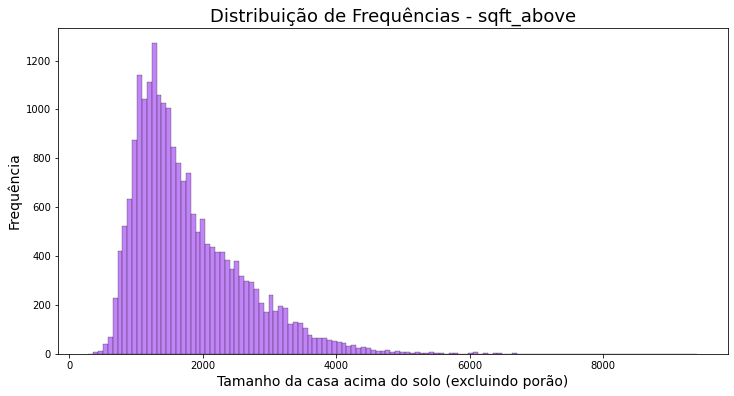

In [ ]:
# histograma - variável 3 (sqft_above)
ax = sns.histplot(data=dados,x='sqft_above', kde = False,color = '#ad5bf4')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - sqft_above', fontsize=18)
ax.set_xlabel('Tamanho da casa acima do solo (excluindo porão)', fontsize=14)
ax.set_ylabel('Frequência',fontsize=14)
ax;

> d) TOP 4 - bathrooms (número de banheiros)

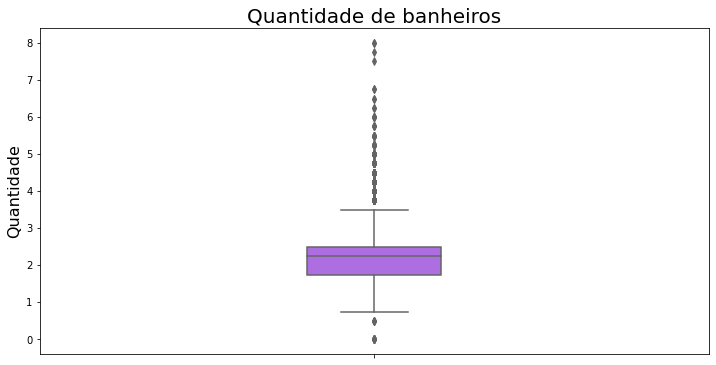

In [ ]:
# boxplot - variável 4  (bathrooms)
ax = sns.boxplot(data=dados,y='bathrooms', orient='v', width=0.2,color = '#ad5bf4')
ax.figure.set_size_inches(12,6)
ax.set_title('Quantidade de banheiros', fontsize=20)
ax.set_ylabel('Quantidade', fontsize=16)
ax;

In [ ]:
dados[['bathrooms']].describe().T

,count,mean,std,min,25%,50%,75%,max
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0


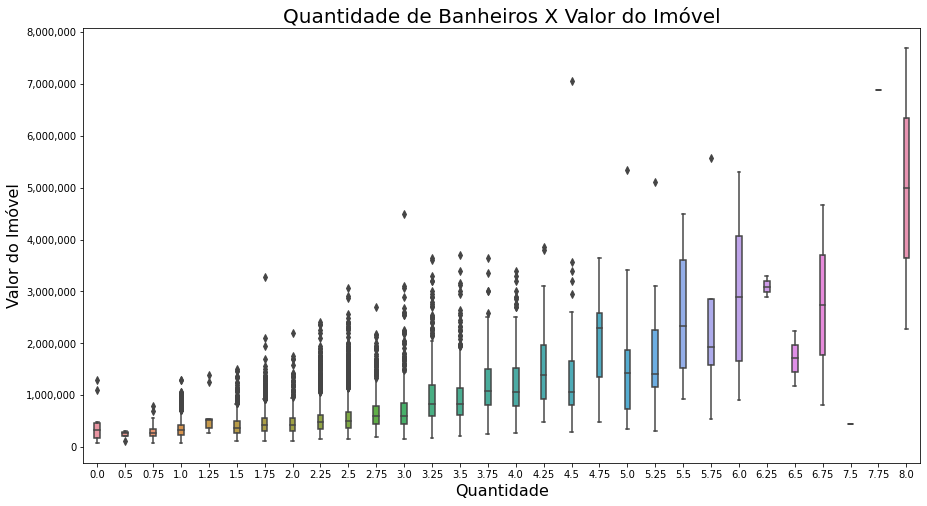

In [ ]:
# boxplot - variável 4  (bathrooms)
ax = sns.boxplot(data=dados, x='bathrooms',y='price', width=0.2)
ax.figure.set_size_inches(15,8)
ax.set_title('Quantidade de Banheiros X Valor do Imóvel', fontsize=20)
ax.set_ylabel('Valor do Imóvel', fontsize=16)
ax.set_xlabel('Quantidade', fontsize=16)
ax.get_yaxis().set_major_formatter(
 matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax;

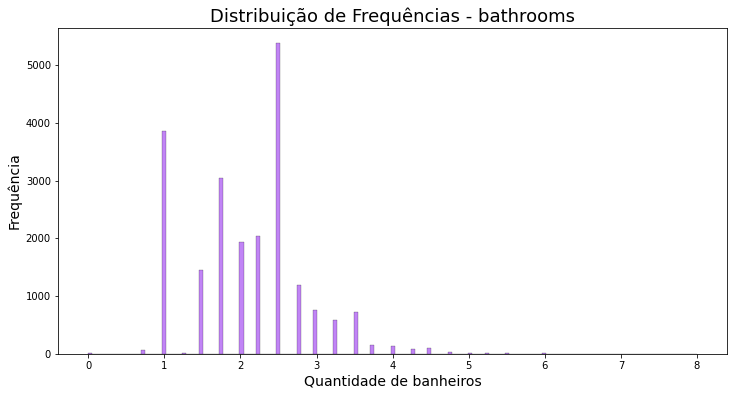

In [ ]:
# histograma - variável 4  (bathrooms)
ax = sns.histplot(data=dados,x='bathrooms', kde = False,color = '#ad5bf4')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - bathrooms', fontsize=18)
ax.set_xlabel('Quantidade de banheiros', fontsize=14)
ax.set_ylabel('Frequência',fontsize=14)
ax;

> e) TOP 5 - view (número de quartos com vista)

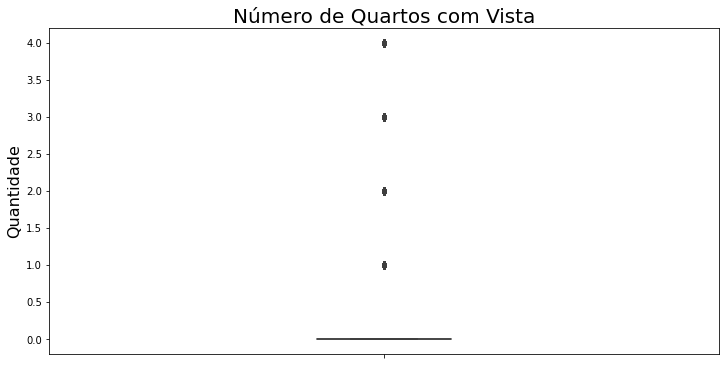

In [ ]:
# boxplot - variável 5  (view)
ax = sns.boxplot(data=dados,y='view', orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Número de Quartos com Vista', fontsize=20)
ax.set_ylabel('Quantidade', fontsize=16)
ax;

In [ ]:
dados[['view']].describe().T

,count,mean,std,min,25%,50%,75%,max
view,21613.0,0.234303,0.766318,0.0,0.0,0.0,0.0,4.0


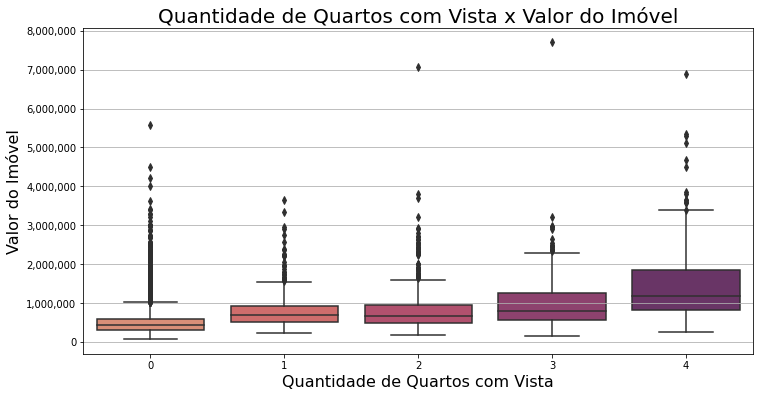

In [ ]:
ax = sns.boxplot(data=dados, x ='view', y='price',palette='flare')
ax.figure.set_size_inches(12,6)
ax.set_title('Quantidade de Quartos com Vista x Valor do Imóvel', fontsize=20)
ax.set_ylabel('Valor do Imóvel', fontsize=16)
ax.set_xlabel('Quantidade de Quartos com Vista', fontsize=16)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.grid(True) # Show the horizontal gridlines

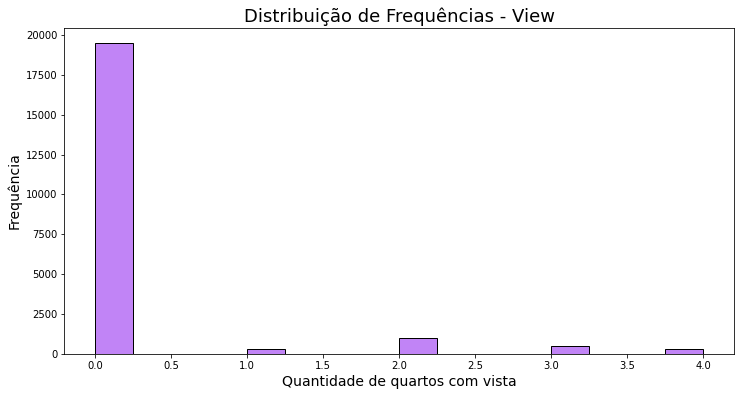

In [ ]:
# histograma - variável 5  (view)
ax = sns.histplot(data=dados, x ='view', kde = False,color = '#ad5bf4')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - View', fontsize=18)
ax.set_xlabel('Quantidade de quartos com vista', fontsize=14)
ax.set_ylabel('Frequência',fontsize=14)
ax;

In [ ]:
dados.view.value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

2. plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a variável correlacionada no eixo X.

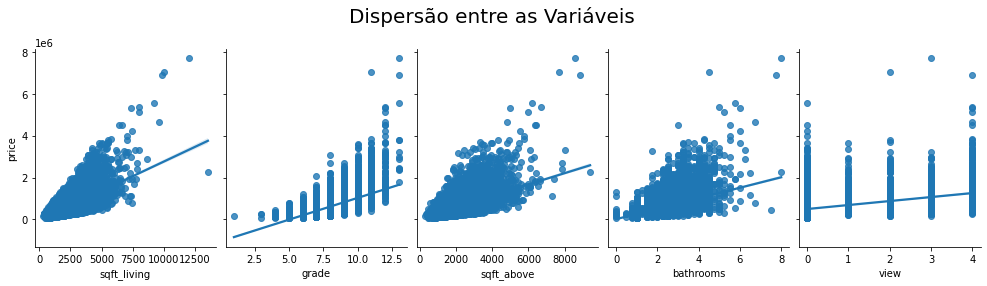

In [ ]:
ax = sns.pairplot(dados, y_vars='price', x_vars=['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view'],kind='reg')
ax.figure.set_size_inches(14, 4)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax;

3. para cada uma das 5 variáveis faça uma regressão linear simples sendo preciso a variável resposta (y) e interprete os resultados.

> a) TOP 1 - sqft_living (tamanho do imóvel)

In [ ]:
Y = dados.price
X = sm.add_constant(dados['sqft_living'])

resultado_regressao = sm.OLS(Y, X).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:50:04   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      

> b) TOP 2 - grade (nota do imóvel)

In [ ]:
Y = dados.price
X = sm.add_constant(dados['grade'])

resultado_regressao = sm.OLS(Y, X).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:50:04   Log-Likelihood:            -3.0123e+05
No. Observations:               21613   AIC:                         6.025e+05
Df Residuals:                   21611   BIC:                         6.025e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.056e+06   1.23e+04    -86.166      0.0

> c) TOP 3 - sqft_above (tamanho do imóvel acima do nível do solo)

In [ ]:
Y = dados.price
X = sm.add_constant(dados['sqft_above'])

resultado_regressao = sm.OLS(Y, X).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.251e+04
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:50:04   Log-Likelihood:            -3.0267e+05
No. Observations:               21613   AIC:                         6.053e+05
Df Residuals:                   21611   BIC:                         6.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.995e+04   4729.812     12.676      0.0

> d) TOP 4 - bathrooms (número de banheiros)

In [ ]:
Y = dados.price
X = sm.add_constant(dados['bathrooms'])

resultado_regressao = sm.OLS(Y, X).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8229.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:50:04   Log-Likelihood:            -3.0412e+05
No. Observations:               21613   AIC:                         6.082e+05
Df Residuals:                   21611   BIC:                         6.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.071e+04   6210.669      1.724      0.0

> e) TOP 5 - view (número de quartos com vista)

In [ ]:
Y = dados.price
X = sm.add_constant(dados['view'])

resultado_regressao = sm.OLS(Y, X).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     4050.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:50:04   Log-Likelihood:            -3.0575e+05
No. Observations:               21613   AIC:                         6.115e+05
Df Residuals:                   21611   BIC:                         6.115e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.955e+05   2396.476    206.759      0.0

# DESAFIO 5 : MODELOS REGRESSIVOS

## Base de Dados

In [ ]:
dados = pd.read_csv('desafio_01_preco_imoveis.csv')

In [ ]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Desafio: Estimando o Preço do Imóvel
Suponha que você trabalha em uma empresa do setor imobiliário. Após explorar as
principais variáveis que impactam o preco dos imóveis,na semana passada, pediram
para você, do time de dados, construir um modelo que estime o preço de um imóvel.
Para isso, você utilizará a mesma base de dados da semana anterior
(desafio_01_preco_imoveis.csv). Como você poderia ajudá-los?

A base contém as seguintes informações,

● id : código identificador do imóvel

● date: data em que o imóvel foi cadastrado

● price: preço do imóvel

● bedrooms: número de quartos

● bathrooms: número de banheiros

● sqft_living: tamanho do imóvel (dentro da casa)

● sqft_lot: tamanho do lote / terreno

● floors: andares

● waterfront: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso
contrário.

● view: indica o número de quartos com vista.

● condition: condição do imóvel, escala de 1 a 5

● grade: nota do imóvel

● sqft_above: tamanho da casa acima do solo (excluindo porão)

● sqft_basement: tamanho do porão

● yr_built: ano em que a casa foi construída

● yr_renovated: ano em que a casa foi renovada

● zipcode: "CEP" do imóvel

● lat: latitude do imóvel

● long: longitude do imóvel



**Distribuição de frequências da variável dependente (y = price)**

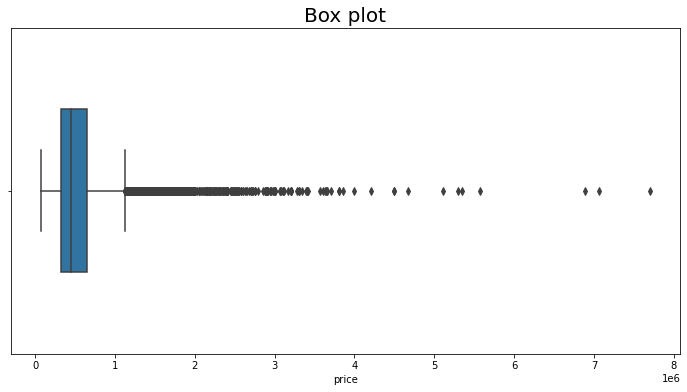

In [ ]:
ax = sns.boxplot(data=dados,x='price', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax;

<ipython-input-159-6c06b5d03798>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['price'])


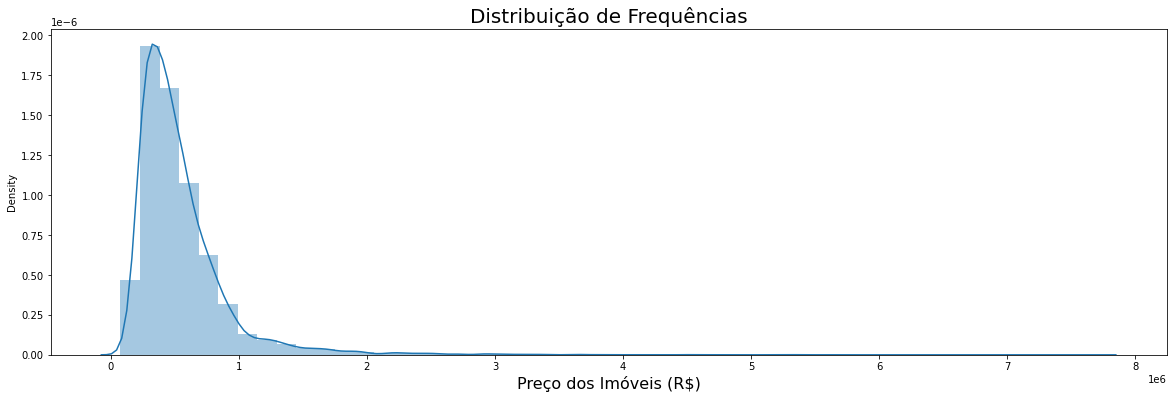

In [ ]:
ax = sns.distplot(dados['price'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax;

**No gráfico percebemos que existe uma concentração muito alta de imóveis com valores mais baixos e uma concentração muito baixa de imóveis mais caros.**

**O que parace fazer muito sentido para o tipo de dados que estamos observando, visto que é mais comum imóveis com valores mais baixos que sigam um mesmo padrão, do que imóveis mais caros, luxuosos, que geralmente são minoria.**

**Sendo assim, o gráfico de distribuição de frequências e o boxplot, nitidamente, mostram que temos uma assimetria à direita.**

**Para estimar um modelo de regressão, seria interessante assumirmos que a variável dependente tem uma distribuição normal, pois dados com distribuição assimétrica podem gerar problemas para estimarmos regressão, uma transformação dos dados para que se aproximem de uma forma simétrica pode ser interessante.**

### Materiais de Apoio

https://medium.com/creditas-tech/terminei-a-modelagem-e-agora-parte-i-604232bb5114

https://medium.com/analytics-vidhya/deploying-linear-regression-ml-model-as-web-application-on-docker-3409f9464a27 (conteúdo em inglês: utilizar google
tradutor caso necessário)

https://docs.microsoft.com/en-us/sql/machine-learning/tutorials/python-ski-rental-linear-regression-deploy-model?view=sql-server-ver15 (conteúdo em inglês:
utilizar google tradutor caso necessário)

### Funções para os gráficos

In [ ]:
def freq_residuos(res):
  ax = sns.histplot(res)
  ax.figure.set_size_inches(12, 6)
  ax.set_title('Distribuição de Frequência dos Resíduos', fontsize=18)
  ax.set_xlabel('Preço', fontsize=14)
  ax.set_ylabel('Quantidade', fontsize=14)
  ax;


def dispersao_estimado_real(estimado,real):
  ax = sns.scatterplot(x=estimado, y=real)
  ax.figure.set_size_inches(12, 6)
  ax.set_title('Previsão X Real', fontsize=18)
  ax.set_xlabel('Preço do Imóvel ($) - Previsão', fontsize=14)
  ax.set_ylabel('Preço do Imóvel ($) - Real', fontsize=14)
  ax;


def residuos_X_previsao(previsao,residuo):
  ax = sns.scatterplot(x=previsao, y=residuo, s=150)
  ax.figure.set_size_inches(20, 8)
  ax.set_title('Resíduos X Previsão', fontsize=18)
  ax.set_xlabel('Preço do Imóvel ($) - Previsão', fontsize=14)
  ax.set_ylabel('Resíduos', fontsize=14)
  ax;


def previsto_X_residuo_ao_quadrado(previsto,residuo):
  ax = sns.scatterplot(x=previsto, y=residuo**2, s=150)
  ax.figure.set_size_inches(20, 8)
  ax.set_title('Resíduos X Previsão', fontsize=18)
  ax.set_xlabel('Preço do Imóvel ($) - Previsão', fontsize=14)
  ax.set_ylabel('Resíduos²', fontsize=14)
  ax;

### 1 - Selecione as principais variáveis que você gostaria de incluir no modelo de precificação do imóvel.



In [ ]:
correlacao = dados.corr()
correlacao

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500


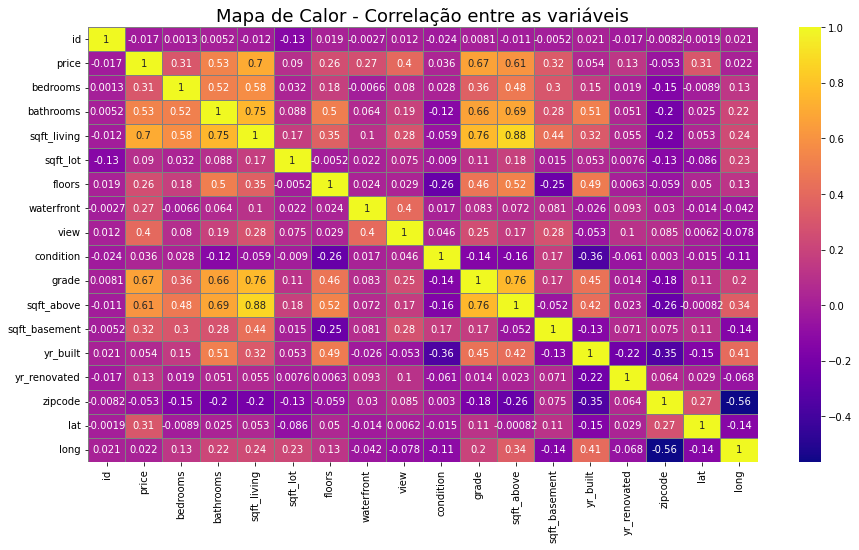

In [ ]:
ax = sns.heatmap(correlacao, annot=True, cmap='plasma', linecolor='gray', linewidths=1)
ax.figure.set_size_inches(15,8)
ax.set_title("Mapa de Calor - Correlação entre as variáveis", fontsize=18)
ax;

In [ ]:
corr_price = correlacao.price.reset_index().sort_values(by=['price'],ascending=False)
corr_price

,index,price
1,price,1.000000
4,sqft_living,0.702035
10,grade,0.667434
11,sqft_above,0.605567
3,bathrooms,0.525138
8,view,0.397293
12,sqft_basement,0.323816
2,bedrooms,0.308350
16,lat,0.307003
7,waterfront,0.266369


Uma das formas de escolher variáveis, para utilizar em uma regressão linear, é observar quais as variáveis independentes são mais correlacionadas com a variável dependente.

Fazendo esta observação, percebe-se que estas variáveis são: sqft_living, grade, sqft_above e bathrooms.

Porém, outra coisa que também deve ser observado é a correlação entre as variáveis independentes escolhidas. Para o caso das variáveis descritas acima, é notória uma correlação alta entre elas também (como pode ser observado na matriz de correlação e no mapa de calor da correlação), o que pode atrapalhar o modelo de regressão.

A seguir, na parte 2, serão testados alguns modelos, com algumas configurações diferentes de variáveis, a fim de uma comparação entre estes modelos.

**Criando um dataset com as variáveis mais correlacionadas transformadas usando log**

In [ ]:
# Criando as novas variáveis log para cada variável existente
dados_modificados = pd.DataFrame()
dados_modificados['log_price'] = np.log(dados['price'])
dados_modificados['log_sqft_living'] = np.log(dados['sqft_living'])
dados_modificados['log_grade'] = np.log(dados['grade'])
dados_modificados['log_sqft_above'] = np.log(dados['sqft_above'])
dados_modificados['log_bathrooms'] = np.log(dados['bathrooms']+1)
dados_modificados['log_view'] = np.log(dados['view']+1)

In [ ]:
dados_modificados.head()

,log_price,log_sqft_living,log_grade,log_sqft_above,log_bathrooms,log_view
0,12.309982,7.073270,1.945910,7.073270,0.693147,0.0
1,13.195614,7.851661,1.945910,7.682482,1.178655,0.0
2,12.100712,6.646391,1.791759,6.646391,0.693147,0.0
3,13.311329,7.580700,1.945910,6.956545,1.386294,0.0
4,13.142166,7.426549,2.079442,7.426549,1.098612,0.0


<ipython-input-166-4ee58b22a346>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados_modificados['log_price'])


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='log do Preço dos Imóveis', ylabel='Density'>

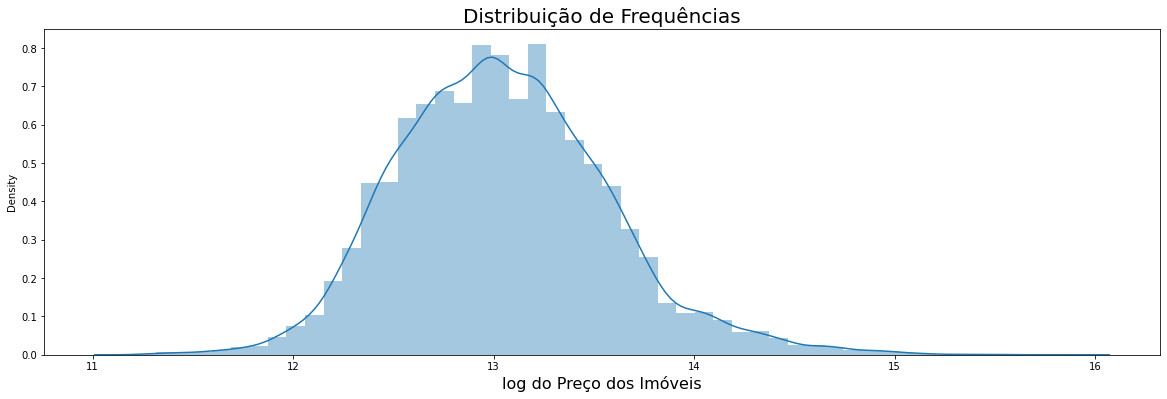

In [ ]:
ax = sns.distplot(dados_modificados['log_price'])
ax.figure.set_size_inches(20,6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

**Observa-se que utilizando a transformação nos dados, a distribuição dos valores das casas chegaram mais próximo de uma distrbuição normal. Este dataset será testado posteriormente na regressão para observarmos se transformar a distribuição vai influenciar no R².**

### 2 - Construa um modelo de regressão linear multivariada para estimar o preço do imóvel. Lembre-se de: Analisar a tabela de regressão e os resíduos do modelo e interprete os resultados


#### Modelo 1 - Testando variações de configurações com as variáveis mais correlacionadas

##### Configuração do modelo 1 de Regressão

In [ ]:
Y = dados.price
#X = dados[['sqft_living', 'grade', 'sqft_basement','view']]
#X = dados[['sqft_living', 'grade', 'sqft_above','bathrooms']]
#X = dados[['sqft_living', 'grade', 'sqft_basement','view']]
X = dados[['sqft_living', 'grade', 'sqft_above','bathrooms','view']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
X_train_com_constante = sm.add_constant(X_train)
X_test_com_constante = sm.add_constant(X_test)

In [ ]:
modelo = sm.OLS(y_train,X_train_com_constante,hasconst=True).fit()

Obtendo o coeficiente de determinação (R²) para as previsões do modelo

In [ ]:
y_previsto = modelo.predict(X_test_com_constante)

In [ ]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.57


In [ ]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     4174.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:50:07   Log-Likelihood:            -2.0870e+05
No. Observations:               15129   AIC:                         4.174e+05
Df Residuals:                   15123   BIC:                         4.175e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.601e+05   1.56e+04    -35.977      

R² = 0.534  (X = dados[[ 'grade', 'sqft_above','bathrooms','view']])

R² = 0.54 (X = dados[['sqft_living', 'sqft_above','bathrooms','view']])

R² = 0.578 (X = dados[['sqft_living', 'grade','bathrooms','view']])

R² = 0.578 (X = dados[['sqft_living', 'grade', 'sqft_above','view']])

R² = 0.58 (X = dados[['sqft_living', 'grade', 'sqft_above','bathrooms','view']])

R² = 0.545 (X = dados[['sqft_living', 'grade', 'sqft_above','bathrooms']])

R² = 0.578 (X = dados[['sqft_living', 'grade', 'sqft_basement','view']])

**Após testar algumas configurações de variáveis, percebeu-se que a melhor configuração, dentre os testes realizados, seria:**

R² = 0.58 (X = dados[['sqft_living', 'grade', 'sqft_above','bathrooms','view']])

##### Gráficos sobre o modelo 1

Gráfico de dispersão entre valor estimado e valor real

In [ ]:
y_previsto_train = modelo.predict(X_train_com_constante) # previsões para os dados de treino

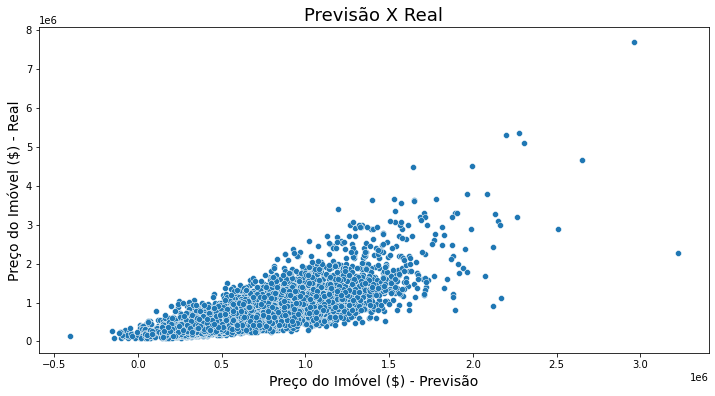

In [ ]:
dispersao_estimado_real(y_previsto_train,y_train)

Temos alguns pontos dispersos em nosso gráfico, o que indica que provavelmente nossa estimativa está razoavelmente precisa, poderia melhorar o modelo.

Obtendo resíduo

In [ ]:
residuo = y_train - y_previsto_train

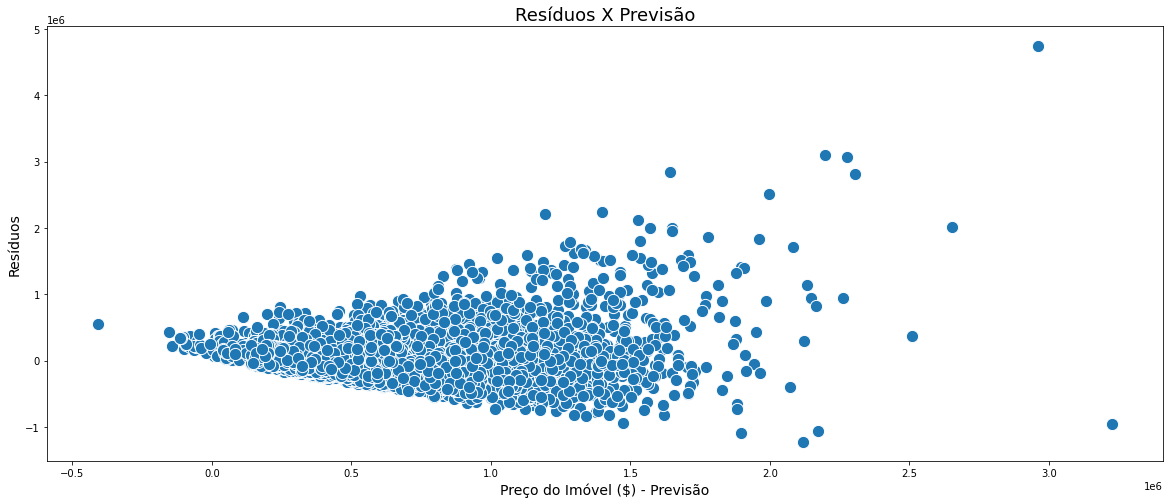

In [ ]:
residuos_X_previsao(y_previsto_train,residuo)

Gráfico utilizando os resíduos ao quadrado

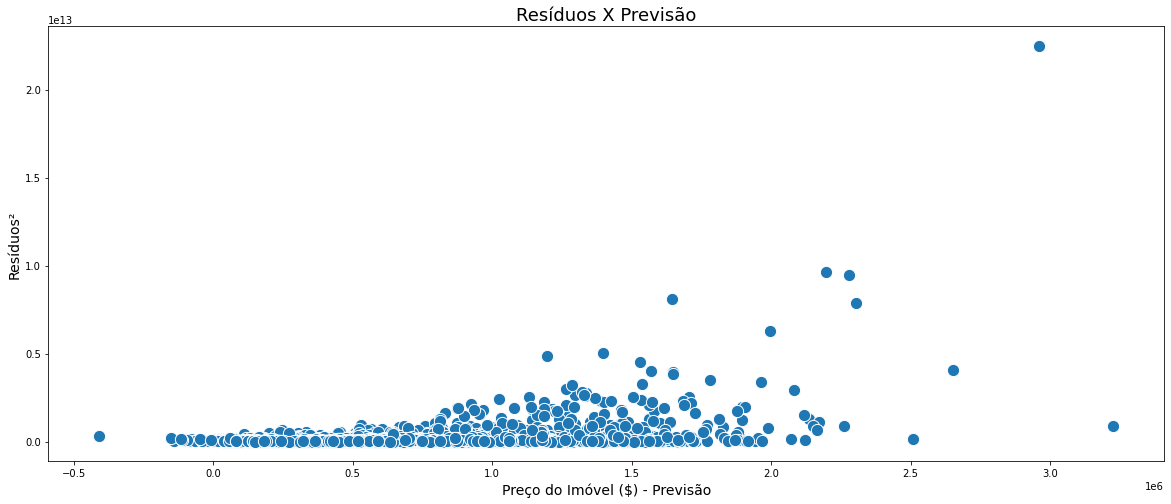

In [ ]:
previsto_X_residuo_ao_quadrado(y_previsto_train,residuo)

Distribuição de Frequência dos resíduos

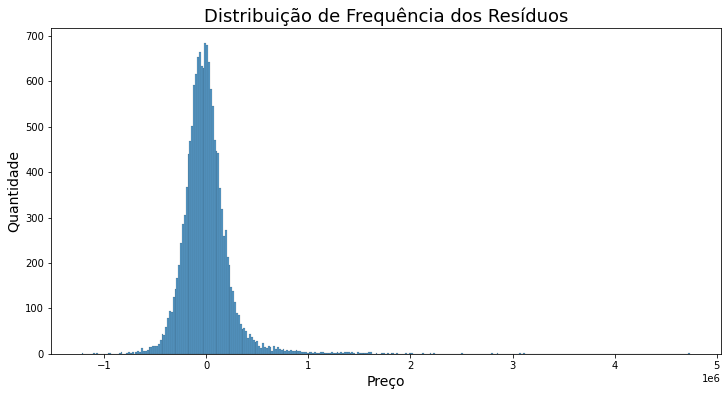

In [ ]:
freq_residuos(residuo)

Uma curva agradável que indica dados bem comportados, o que favorece um modelo bem estimado. Porém talvez mais testes realizados com as variáveis, poderia melhorar a precisão do modelo.

#### Modelo 2 - Utilizando todas as variáveis independentes numéricas

##### Configuração do modelo de Regressão

In [ ]:
Y2 = dados.price
#X2 = dados.drop(columns=['price','date','id']) #todas as variáveis exceto as não numéricas e o id  => R² = 0.
X2 = dados.drop(columns=['price','date','id','sqft_lot','floors','yr_renovated','sqft_basement','condition'])# dimuindo variáveis e observando o efeito no valor do R²

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=0)

In [ ]:
X_train2_com_constante = sm.add_constant(X_train2)
X_test2_com_constante = sm.add_constant(X_test2)

modelo2 = sm.OLS(y_train2,X_train2_com_constante,hasconst=True).fit()

Obtendo o coeficiente de determinação (R²) para as previsões do modelo:

In [ ]:
y_previsto2 = modelo2.predict(X_test2_com_constante)

In [ ]:
print('R² = %s' % metrics.r2_score(y_test2, y_previsto2).round(2))

R² = 0.69


In [ ]:
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     3225.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:50:10   Log-Likelihood:            -2.0612e+05
No. Observations:               15129   AIC:                         4.123e+05
Df Residuals:                   15117   BIC:                         4.124e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.055e+06   3.29e+06      2.756      

**-------------Resultado das exclusões de variáveis no valor do R²-------------**


R² = 0.703 (X2 = dados.drop(columns=['price','date','id'])

R² = 0.703 (X2 = dados.drop(columns=['price','date','id','sqft_lot'])

R² = 0.703 (X2 = dados.drop(columns=['price','date','id','sqft_lot','floors'])

R² = 0.703 (X2 = dados.drop(columns=['price','date','id','sqft_lot','floors','yr_renovated'])

R² = 0.681 (X2 = dados.drop(columns=['price','date','id','sqft_lot','floors','yr_renovated','yr_built']))

R² = 0.699 (X2 = dados.drop(columns=['price','date','id','sqft_lot','floors','yr_renovated','bedrooms'])

R² = 0.703 (X2 = dados.drop(columns=['price','date','id','sqft_lot','floors','yr_renovated','sqft_basement'])

R² = 0.701 (X2 = dados.drop(columns=['price','date','id','sqft_lot','floors','yr_renovated','sqft_basement','condition'])

R² = 0.686 (X2 = dados.drop(columns=['price','date','id','sqft_lot','floors','yr_renovated','sqft_basement','waterfront']))

R² = 0.656 (X2 = dados.drop(columns=['price','date','id','sqft_lot','floors','yr_renovated','sqft_basement','lat']))

R² = 0.699 (X2 = dados.drop(columns=['price','date','id','sqft_lot','floors','yr_renovated','sqft_basement','long']))

**Após essas modificações, optou-se por escolher o modelo com a seguinte configuração:**

R² = 0.701 (X2 = dados.drop(columns=['price','date','id','sqft_lot','floors','yr_renovated','sqft_basement','condition'])

**Esse pode não ser o melhor modelo, porém dada a limitação do tempo e dentre os testes realizados ele foi o que obteve o melhor resultado de R² levando em consideração excluir variáveis que não reduzissem o valor do R².**

##### Gráficos sobre o modelo 2

Gráfico de dispersão entre valor estimado e valor real

In [ ]:
y_previsto2_train = modelo2.predict(X_train2_com_constante) # previsões para os dados de treino

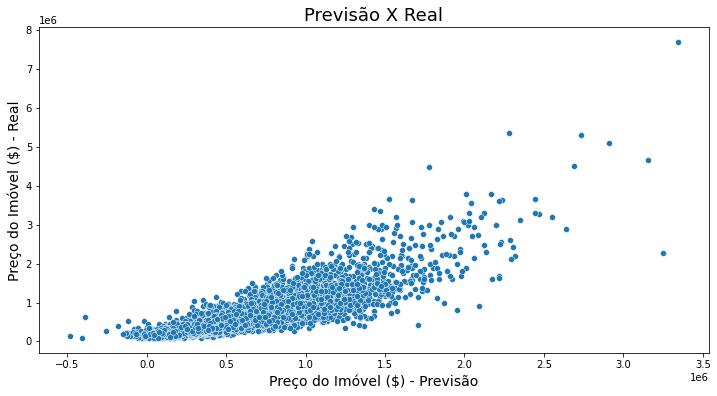

In [ ]:
dispersao_estimado_real(y_previsto2_train,y_train2)

Alguns pontos dispersos, o que mostra que o modelo pode ser melhorado para que fique mais preciso.

Obtendo o resíduo

In [ ]:
residuo2 = y_train2 - y_previsto2_train

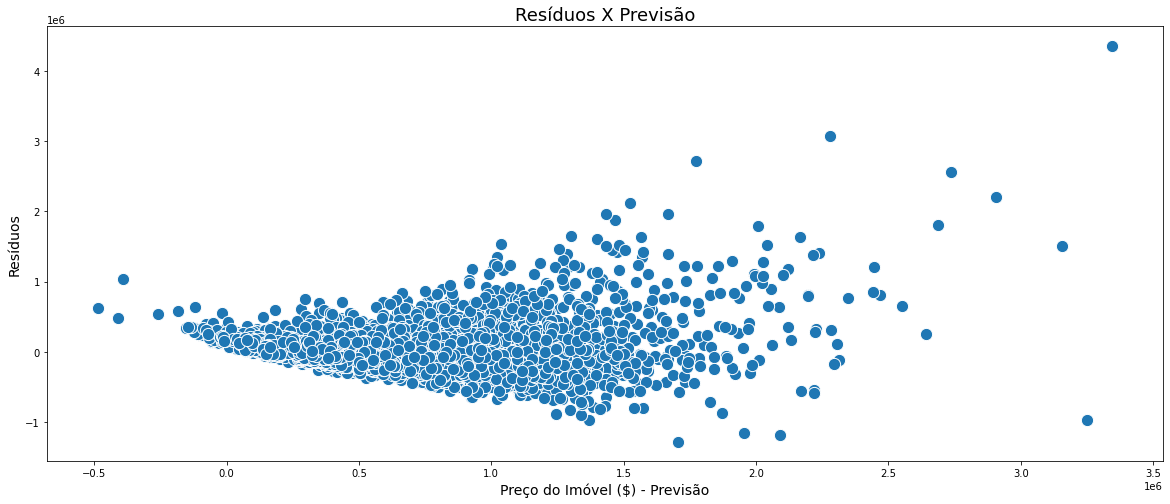

In [ ]:
residuos_X_previsao(y_previsto2_train,residuo2)

Gráfico dos resíduos ao quadrado

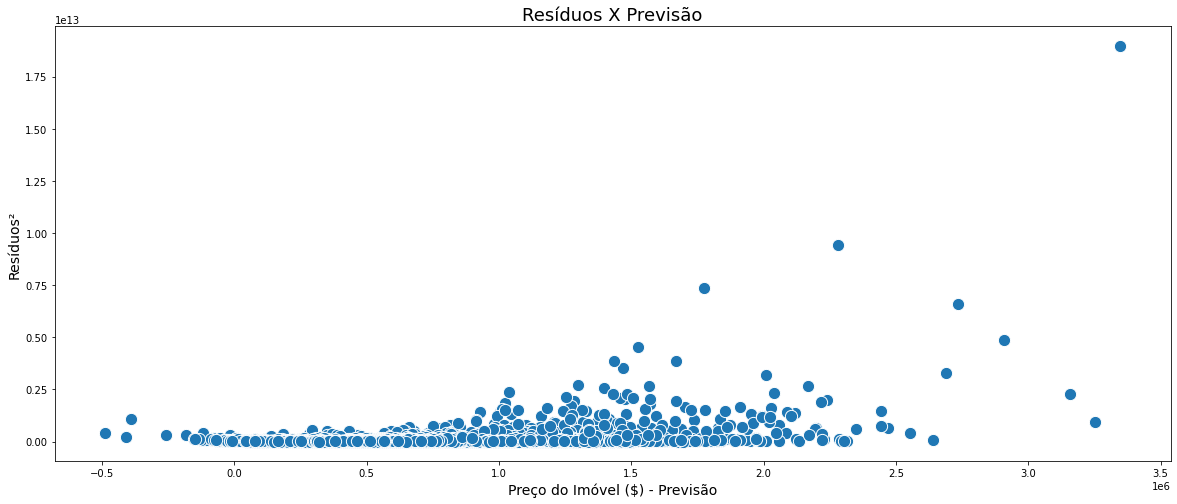

In [ ]:
previsto_X_residuo_ao_quadrado(y_previsto2_train,residuo2)

Distribuição de Frequência dos resíduos

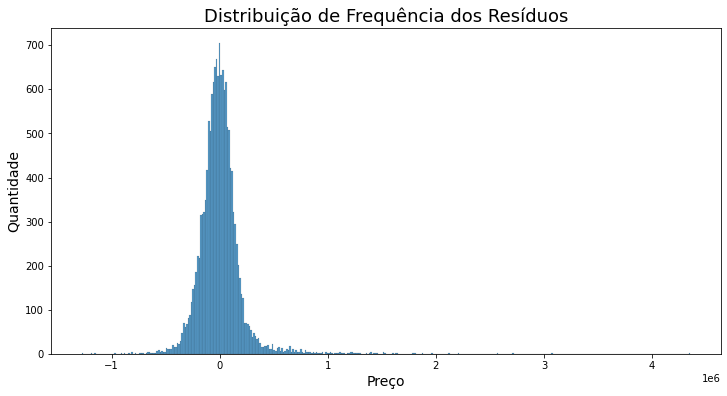

In [ ]:
freq_residuos(residuo2)

Como resultado, temos uma curva agradável que indica dados bem comportados, o que favorece um modelo bem estimado. Porém talves mais testes realizados com as variáveis, poderia melhorar a precisão do modelo.

#### Modelo 3 - Utilizando variáveis independentes com transformação de log

##### Configuração do modelo 3 de regressão

In [ ]:
Y3 = dados_modificados.log_price
X3 = dados_modificados[['log_sqft_living', 'log_grade', 'log_sqft_above','log_view']]

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.3, random_state=0)

In [ ]:
X_train3_com_constante = sm.add_constant(X_train3)
X_test3_com_constante = sm.add_constant(X_test3)

In [ ]:
modelo3 = sm.OLS(y_train3,X_train3_com_constante,hasconst=True).fit()

Obtendo o coeficiente de determinação (R²) para as previsões do modelo:

In [ ]:
y_previsto3 = modelo3.predict(X_test3_com_constante)

In [ ]:
print('R² = %s' % metrics.r2_score(y_test3, y_previsto3).round(2))

R² = 0.57


In [ ]:
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     4839.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:50:12   Log-Likelihood:                -5552.6
No. Observations:               15129   AIC:                         1.112e+04
Df Residuals:                   15124   BIC:                         1.115e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.1638      0.053    1

##### Gráficos do modelo 3

Gráfico de dispersão entre valor estimado e valor real

In [ ]:
y_previsto3_train = modelo3.predict(X_train3_com_constante) # previsões para os dados de treino

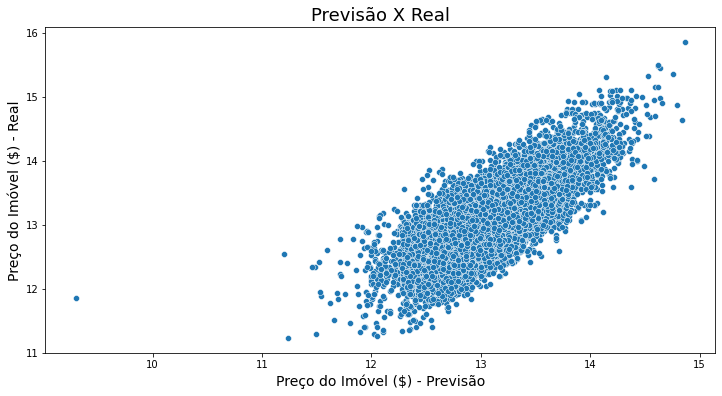

In [ ]:
dispersao_estimado_real(y_previsto3_train,y_train3)

Alguns pontos dispersos, o que mostra que o modelo pode ser melhorado para que fique mais preciso.

Obtendo o resíduo

In [ ]:
residuo3 = y_train3 - y_previsto3_train

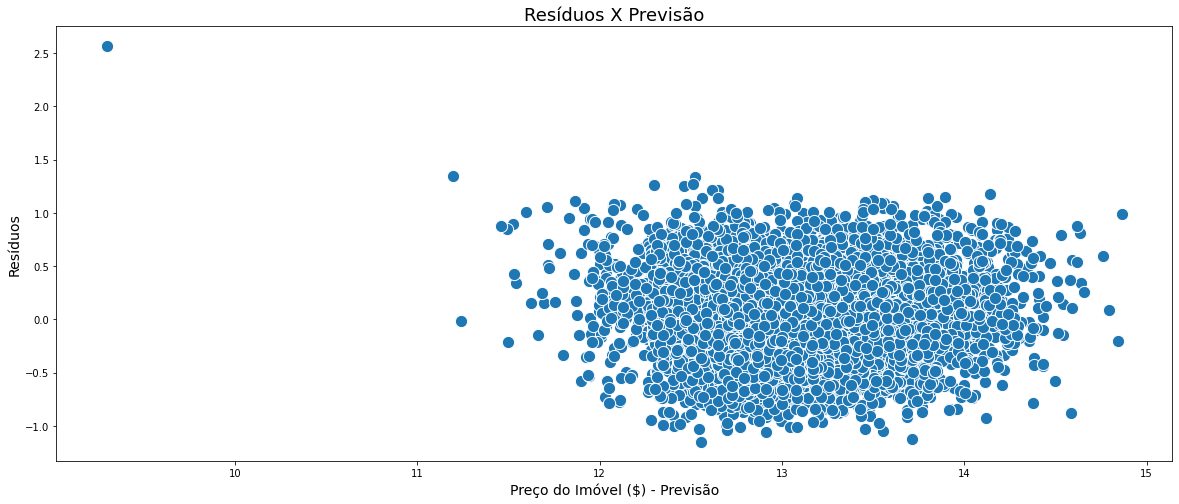

In [ ]:
residuos_X_previsao(y_previsto3_train,residuo3)

Gráfico dos resíduos ao quadrado

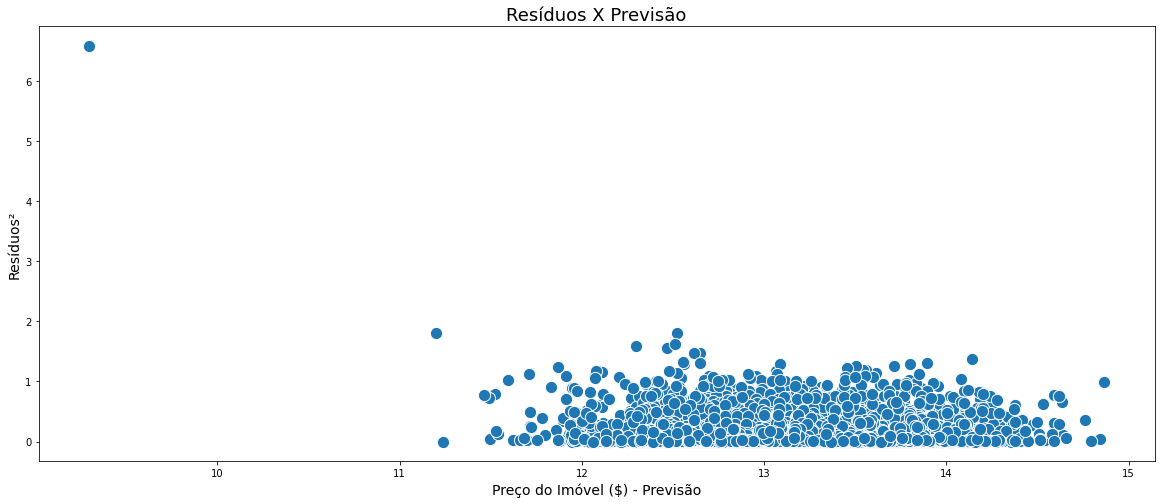

In [ ]:
previsto_X_residuo_ao_quadrado(y_previsto3_train,residuo3)

Distribuição de Frequência dos resíduos

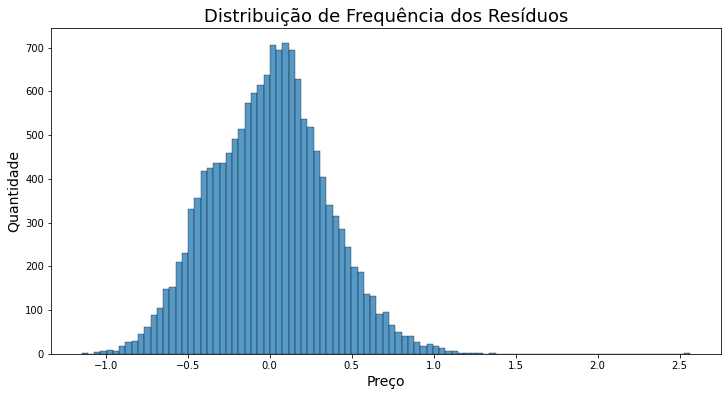

In [ ]:
freq_residuos(residuo3)

Como resultado, temos uma curva agradável que indica dados bem comportados, o que favorece um modelo bem estimado. Porém talves mais testes realizados com as variáveis, poderia melhorar a precisão do modelo.

#### Métricas de Comparação entre os modelos

In [ ]:
# Métricas para modelo 1

EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5.947101e+10
REQM,2.438668e+05
R²,5.700000e-01


In [ ]:
# Métricas para modelo 2

EQM_2 = metrics.mean_squared_error(y_test2, y_previsto2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y_test2, y_previsto2)).round(2)
R2_2 = metrics.r2_score(y_test2, y_previsto2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,4.300423e+10
REQM,2.073746e+05
R²,6.900000e-01


In [ ]:
# Métricas para modelo 3

EQM = metrics.mean_squared_error(y_test3, y_previsto3).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test3, y_previsto3)).round(2)
R2 = metrics.r2_score(y_test3, y_previsto3).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,0.12
REQM,0.34
R²,0.57


Ao comparar os três modelos, percebe-se que o modelo 2 possui um R² maior que os demais e que o EQM e REQM são menores, fazendo com que esse modelo seja o escolhido dentre os três, dado que ele estima o preço melhor.

### 3 - Suponha agora que você encontrou um modelo ideal. Explique como você faria para colocar esse modelo em produção? Entenda por modelo em produção um modelo que a cada apartamento novo inserido na base precifique-o com base no seu modelo.

#### Salvando modelo

In [ ]:
output = open('melhor_modelo', 'wb')
pickle.dump(modelo2, output)
output.close()

#### Função que retorna o valor do imóvel de acordo com as características dele

In [ ]:
def preco_imovel(bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_above,yr_built,zipcode,lat,longi):

  modelo_salvo = open('melhor_modelo','rb')

  model = pickle.load(modelo_salvo)

  modelo_salvo.close()

  entrada =  [1,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_above,yr_built,zipcode,lat,longi]

  return model.predict(entrada)[0]

#### Simulação de uma "tela" com o usuário

In [ ]:
bedrooms = float(input("Informe o valor de bedrooms: "))
bathrooms = float(input("Informe o valor de bathrooms: "))
sqft_living = float(input("Informe o valor de sqft_living: "))
waterfront = float(input("Informe o valor de waterfront: "))
view = float(input("Informe o valor de view: "))

grade = float(input("Informe o valor de grade: "))
sqft_above = float(input("Informe o valor de sqft_above: "))
yr_built = float(input("Informe o valor de yr_built: "))
zipcode = float(input("Informe o valor de zipcode: "))
lat = float(input("Informe o valor de lat: "))
longi = float(input("Informe o valor de long: "))

print('\nPreço do imóvel: {0:.2f}\n'.format(preco_imovel(bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_above,yr_built,zipcode,lat,longi)))

Informe o valor de bedrooms: 3
Informe o valor de bathrooms: 1
Informe o valor de sqft_living: 1180
Informe o valor de waterfront: 0
Informe o valor de view: 0
Informe o valor de grade: 7
Informe o valor de sqft_above: 1180
Informe o valor de yr_built: 1955
Informe o valor de zipcode: 98178
Informe o valor de lat: 47.5112
Informe o valor de long: -122.257

Preço do imóvel: 232005.44



# Finalizando


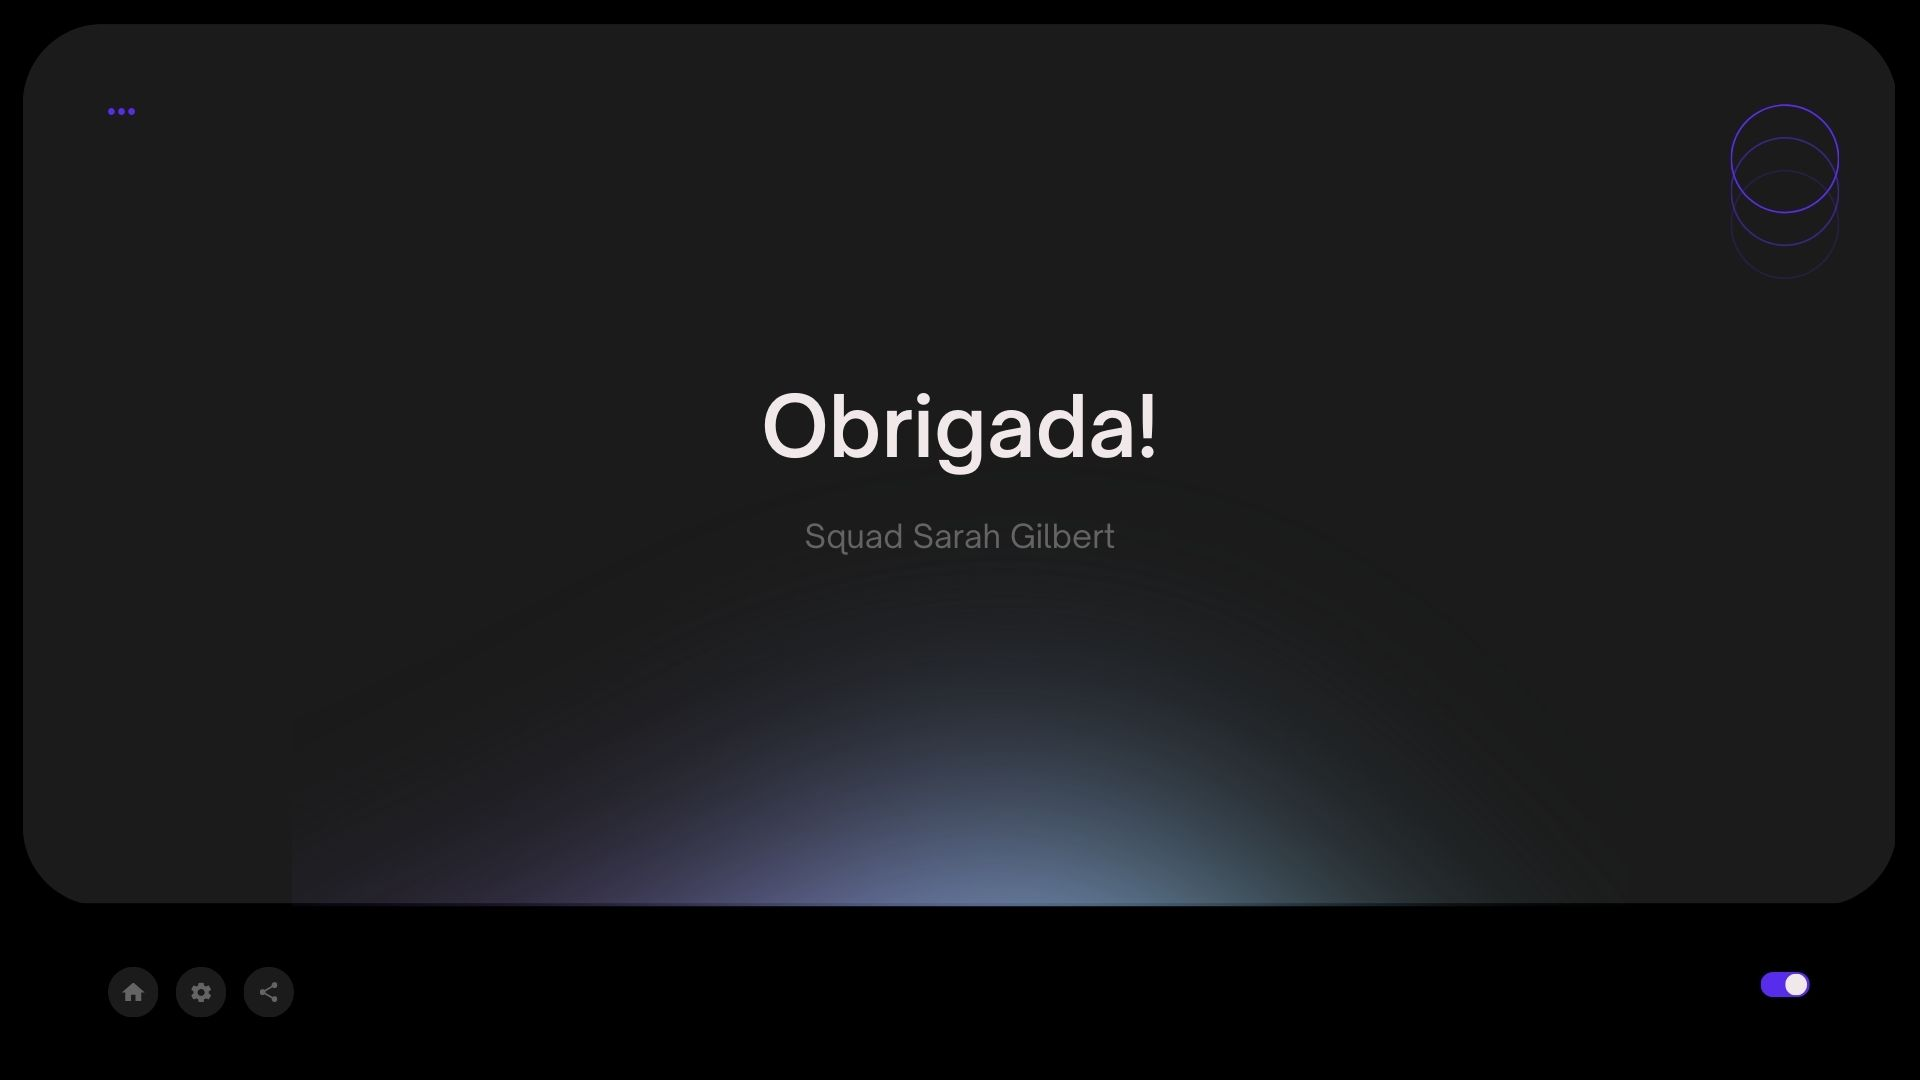